# Libraries

In [1]:
# Libraries

import pandas as pd
import numpy as np
import glob
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm
import math
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn import metrics
# hide warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_theme();

# Datasets

## - Dataset - Domestic Travel by Irish Residents

In [2]:
dd1 = pd.read_csv("HTQ10.20240322T190314.csv");dd1.head()

,Statistic Label,Quarter,Reason for Journey,Region Visited,UNIT,VALUE
0,Number of Trips by Irish Residents,2003Q3,All reasons for journey,State,Thousand,NaN
1,Number of Trips by Irish Residents,2003Q3,All reasons for journey,"Border, Midland and Western",Thousand,NaN
2,Number of Trips by Irish Residents,2003Q3,All reasons for journey,Border,Thousand,NaN
3,Number of Trips by Irish Residents,2003Q3,All reasons for journey,Midland,Thousand,NaN
4,Number of Trips by Irish Residents,2003Q3,All reasons for journey,West,Thousand,NaN


In [3]:
dd2 = pd.read_csv("HTQ17.20240322T190314.csv");dd2.head()

,Statistic Label,Quarter,Reason for Journey,Region Visited,UNIT,VALUE
0,Number of Trips by Irish Residents,2018Q1,All reasons for journey,State,Thousand,2118.0
1,Number of Trips by Irish Residents,2018Q1,All reasons for journey,Northern and Western,Thousand,431.0
2,Number of Trips by Irish Residents,2018Q1,All reasons for journey,Border,Thousand,NaN
3,Number of Trips by Irish Residents,2018Q1,All reasons for journey,West,Thousand,NaN
4,Number of Trips by Irish Residents,2018Q1,All reasons for journey,Southern,Thousand,1038.0


In [4]:
print(dd1.shape,dd2.shape)

(8250, 6) (4140, 6)


In [5]:
print(dd1.info(),dd2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Statistic Label     8250 non-null   object 
 1   Quarter             8250 non-null   object 
 2   Reason for Journey  8250 non-null   object 
 3   Region Visited      8250 non-null   object 
 4   UNIT                8250 non-null   object 
 5   VALUE               3324 non-null   float64
dtypes: float64(1), object(5)
memory usage: 386.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Statistic Label     4140 non-null   object 
 1   Quarter             4140 non-null   object 
 2   Reason for Journey  4140 non-null   object 
 3   Region Visited      4140 non-null   object 
 4   UNIT                4140 non-null   object 

## - Dataset - Climatic Conditions in Ireland

In [6]:
std_name = '*.csv'
i=1
list_dataframes = []
for i in glob.glob(std_name):
    ddtp = pd.read_csv(i)
    if 'year' in ddtp.columns:
        ddtp = ddtp[ddtp['year']>=2003] 
    list_dataframes.append(ddtp)

In [7]:
list_dataframes[1]

,region,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,Cork,2004,5,11.6,17.6,5.3,14.4,8.8,37.1,2.4,9.7,57,
1,Cork,2004,6,14.2,20,7.2,16.7,11.8,,2.8,10.9,36,
2,Cork,2004,8,15.7,20.7,8.4,18.3,13.1,110.9,4.2,10.5,41,
3,Cork,2004,9,14.4,21.3,7.3,16.2,12.6,94,3.6,13.5,51,
4,Cork,2004,10,10.7,14.8,2.8,13,8.4,141.5,0.1,14,55,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Cork,2023,10,12.6,16.8,4.3,14.6,10.6,196.7,0.6,10.7,41,
232,Cork,2023,11,10.2,13.8,2.5,11.9,8.4,115.3,-0.8,15.2,55,
233,Cork,2023,12,9.6,12.8,1.5,11.1,8,123.1,-2.9,17,64,
234,Cork,2024,1,6.7,12.9,-1.9,8.9,4.4,80.9,-8.8,14.3,57,


In [8]:
## Removing dataframes that are not gonna be used
indexs_remove = [5,6]
for i in reversed(indexs_remove):
    list_dataframes.pop(i)

# Data Preparation

## - Data Preparation - Domestic Travel by Irish Residents

In [9]:
# Concatenating Dataframes

dd = pd.concat([dd1,dd2],ignore_index = True)
dd.head()

,Statistic Label,Quarter,Reason for Journey,Region Visited,UNIT,VALUE
0,Number of Trips by Irish Residents,2003Q3,All reasons for journey,State,Thousand,NaN
1,Number of Trips by Irish Residents,2003Q3,All reasons for journey,"Border, Midland and Western",Thousand,NaN
2,Number of Trips by Irish Residents,2003Q3,All reasons for journey,Border,Thousand,NaN
3,Number of Trips by Irish Residents,2003Q3,All reasons for journey,Midland,Thousand,NaN
4,Number of Trips by Irish Residents,2003Q3,All reasons for journey,West,Thousand,NaN


In [10]:
dd.shape

(12390, 6)

In [11]:
# Removing Collumn UNIT
dd = dd.drop(columns=['UNIT'])
dd.head()

,Statistic Label,Quarter,Reason for Journey,Region Visited,VALUE
0,Number of Trips by Irish Residents,2003Q3,All reasons for journey,State,NaN
1,Number of Trips by Irish Residents,2003Q3,All reasons for journey,"Border, Midland and Western",NaN
2,Number of Trips by Irish Residents,2003Q3,All reasons for journey,Border,NaN
3,Number of Trips by Irish Residents,2003Q3,All reasons for journey,Midland,NaN
4,Number of Trips by Irish Residents,2003Q3,All reasons for journey,West,NaN


In [12]:
# Transposing the Dataframe
dd = dd.pivot_table(index=['Quarter','Reason for Journey','Region Visited'],columns = 'Statistic Label', values = 'VALUE').reset_index()
dd.head()

Statistic Label,Quarter,Reason for Journey,Region Visited,Average Length of Stay by Irish Residents,Number of Nights by Irish Residents,Number of Trips by Irish Residents
0,2003Q3,Business,Border,3.7,37.0,10.0
1,2003Q3,Business,Dublin,2.3,93.0,41.0
2,2003Q3,Business,Mid-East,3.6,29.0,8.0
3,2003Q3,Business,Mid-West,3.7,44.0,12.0
4,2003Q3,Business,Midland,3.0,24.0,8.0


In [13]:
dd.shape

(1547, 6)

In [14]:
dd['Reason for Journey'].unique()

array(['Business', 'Holiday', 'Other reasons',
       'Visiting friends/relatives', 'All reasons for journey'],
      dtype=object)

In [15]:
# Separating the variable "Quarter" in "Year" and "Quarter"
dd[['Year','Quarter']] = dd['Quarter'].str.split('Q',expand = True)
dd.head()

Statistic Label,Quarter,Reason for Journey,Region Visited,Average Length of Stay by Irish Residents,Number of Nights by Irish Residents,Number of Trips by Irish Residents,Year
0,3,Business,Border,3.7,37.0,10.0,2003
1,3,Business,Dublin,2.3,93.0,41.0,2003
2,3,Business,Mid-East,3.6,29.0,8.0,2003
3,3,Business,Mid-West,3.7,44.0,12.0,2003
4,3,Business,Midland,3.0,24.0,8.0,2003


In [16]:
# Renaming and reordering the collums
dd = dd.rename(columns = {'Reason for Journey':'Reason','Region Visited':'Destiny','Average Length of Stay by Irish Residents': 'Nights_Trip',
                          'Number of Nights by Irish Residents':'Total_Nights','Number of Trips by Irish Residents':'Num_Trips'})
dd = dd[['Destiny','Year','Quarter','Reason','Nights_Trip','Total_Nights','Num_Trips']]
dd.columns.name = None
dd.head()

,Destiny,Year,Quarter,Reason,Nights_Trip,Total_Nights,Num_Trips
0,Border,2003,3,Business,3.7,37.0,10.0
1,Dublin,2003,3,Business,2.3,93.0,41.0
2,Mid-East,2003,3,Business,3.6,29.0,8.0
3,Mid-West,2003,3,Business,3.7,44.0,12.0
4,Midland,2003,3,Business,3.0,24.0,8.0


In [17]:
## Transforming variables Year and Quarter in numeric to Merge
dd[['Year','Quarter']] = dd[['Year','Quarter']].astype('int64')

## - Data Preparation - Climatic Conditions in Ireland

In [18]:
## Creating a function to define Quarter
def quarter_month(month):
    return(month - 1) // 3 + 1

In [19]:
## Creating variable Quarter
## Transforming variables in numeric
## ## Summarising the variables with mean based in Region, Year and Quarter

list_df_preps = []
for i in list(range(0,len(list_dataframes))):
    df = list_dataframes[i]
    df['quarter'] = df['month'].apply(quarter_month)
    for i in list(range(3,13)):
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i],errors = 'coerce')
    ## Summarising the variables with mean based in Region, Year and Quarter
    df = df.drop(columns = ['month'])
    df_summar = df.groupby(['region','year','quarter']).mean().reset_index()
    list_df_preps.append(df_summar)

In [20]:
## Concatenating the dataframes of Climate Conditions
dd_clim = pd.concat(list_df_preps, ignore_index = True)
dd_clim

,region,year,quarter,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,Clare,2003,1,7.266667,14.733333,-1.333333,10.633333,3.833333,48.733333,-8.933333,9.866667,51.333333,104.066667
1,Clare,2003,2,12.833333,23.766667,5.000000,16.700000,8.966667,82.266667,-1.466667,9.666667,39.000000,169.000000
2,Clare,2003,3,16.500000,25.933333,8.400000,20.266667,12.700000,41.866667,1.466667,7.433333,33.000000,137.066667
3,Clare,2003,4,8.900000,16.666667,-1.266667,12.000000,5.733333,84.900000,-7.800000,8.866667,43.000000,80.833333
4,Clare,2004,1,7.000000,14.066667,-2.600000,10.433333,3.600000,68.700000,-11.300000,9.433333,54.333333,104.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,Wexford,2023,1,7.233333,12.900000,-0.300000,9.566667,4.900000,83.200000,-5.333333,9.333333,39.333333,NaN
963,Wexford,2023,2,12.433333,18.866667,5.466667,15.400000,9.433333,47.066667,2.233333,7.233333,34.666667,NaN
964,Wexford,2023,3,15.466667,22.566667,8.166667,18.533333,12.433333,130.200000,5.433333,8.066667,43.333333,NaN
965,Wexford,2023,4,9.466667,14.700000,1.233333,11.833333,7.133333,171.300000,-1.433333,9.133333,42.000000,NaN


In [21]:
## Transforming data to create the State

state = dd_clim[dd_clim['region'].isin(['Galway','Dublin','Cork'])]
state = state.groupby(['year','quarter']).mean().reset_index()
state['region'] = 'State'

## Transforming data to create the Border, Midland and Western:

bord_mid_west = dd_clim[dd_clim['region'].isin(['Donegal','Mayo','Sligo','Roscommon'])]
bord_mid_west = bord_mid_west.groupby(['year','quarter']).mean().reset_index()
bord_mid_west['region'] = 'Border, Midland and Western'

## Transforming data to create the Border

border = dd_clim[dd_clim['region'].isin(['Donegal','Sligo'])]
border = border.groupby(['year','quarter']).mean().reset_index()
border['region'] = 'Border'

## Transforming data to create the Midland

midland = dd_clim[dd_clim['region'].isin(['Roscommon'])]
midland = midland.groupby(['year','quarter']).mean().reset_index()
midland['region'] = 'Midland'

## Transforming data to create the West

west = dd_clim[dd_clim['region'].isin(['Mayo','Galway'])]
west = west.groupby(['year','quarter']).mean().reset_index()
west['region'] = 'West'

## Transforming data to create the Southern and Eastern

south_eastern = dd_clim[dd_clim['region'].isin(['Clare','Cork','Dublin','Kerry','Meath','Wexford'])]
south_eastern = south_eastern.groupby(['year','quarter']).mean().reset_index()
south_eastern['region'] = 'Southern and Eastern'

## Transforming data to create the Dublin

dublin = dd_clim[dd_clim['region'].isin(['Dublin'])]
dublin = dublin.groupby(['year','quarter']).mean().reset_index()
dublin['region'] = 'Dublin'

## Transforming data to create the Mid-East

mid_east = dd_clim[dd_clim['region'].isin(['Dublin','Meath'])]
mid_east = mid_east.groupby(['year','quarter']).mean().reset_index()
mid_east['region'] = 'Mid-East'

## Transforming data to create the South-East

south_east = dd_clim[dd_clim['region'].isin(['Wexford'])]
south_east = south_east.groupby(['year','quarter']).mean().reset_index()
south_east['region'] = 'South-East'

## Transforming data to create the South-West

south_west = dd_clim[dd_clim['region'].isin(['Cork','Kerry'])]
south_west = south_west.groupby(['year','quarter']).mean().reset_index()
south_west['region'] = 'South-West'

## Transforming data to create the Northern and Western

north_west = dd_clim[dd_clim['region'].isin(['Donegal','Mayo','Sligo'])]
north_west = north_west.groupby(['year','quarter']).mean().reset_index()
north_west['region'] = 'Northern and Western'

## Transforming data to create the Southern

southern = dd_clim[dd_clim['region'].isin(['Clare','Cork','Kerry'])]
southern = southern.groupby(['year','quarter']).mean().reset_index()
southern['region'] = 'Southern'

## Transforming data to create the Eastern and Midland

east_mid = dd_clim[dd_clim['region'].isin(['Dublin','Meath','Roscommon','Tipperary','Westmeath'])]
east_mid = east_mid.groupby(['year','quarter']).mean().reset_index()
east_mid['region'] = 'Eastern and Midland'

clim = pd.concat([state,bord_mid_west,border,midland,west,south_eastern,dublin,mid_east,south_east,south_west,north_west,southern,east_mid],ignore_index = True)

##  - Join the Datasets

In [22]:
## Checking the shape of dataset Domestic Travel by Irish Residents
dd.shape

(1547, 7)

In [23]:
dd['Year'].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [24]:
## Checking the shape of dataset Climate Conditions in Ireland
clim.shape

(1066, 13)

In [25]:
clim['year'].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int64)

In [26]:
## Merging thee datasets
ddt = pd.merge(dd,clim, left_on=['Destiny', 'Year', 'Quarter'], right_on = ['region', 'year', 'quarter'], how = 'left')
ddt

,Destiny,Year,Quarter,Reason,Nights_Trip,Total_Nights,Num_Trips,year,quarter,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,region
0,Border,2003,3,Business,3.7,37.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dublin,2003,3,Business,2.3,93.0,41.0,2003.0,3.0,15.466667,25.866667,5.900000,20.133333,10.900000,32.333333,3.100000,7.300000,34.000000,153.600000,Dublin
2,Mid-East,2003,3,Business,3.6,29.0,8.0,2003.0,3.0,15.466667,25.866667,5.900000,20.133333,10.900000,32.333333,3.100000,7.300000,34.000000,153.600000,Mid-East
3,Mid-West,2003,3,Business,3.7,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Midland,2003,3,Business,3.0,24.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,State,2023,3,Other reasons,2.5,654.0,263.0,2023.0,3.0,15.177778,23.433333,7.255556,18.522222,11.844444,134.888889,3.633333,9.288889,43.888889,145.766667,State
1543,Eastern and Midland,2023,3,Visiting friends/relatives,2.1,1036.0,491.0,2023.0,3.0,14.953333,24.473333,6.173333,18.973333,10.913333,131.886667,2.733333,7.286667,37.466667,145.766667,Eastern and Midland
1544,Northern and Western,2023,3,Visiting friends/relatives,2.4,809.0,335.0,2023.0,3.0,14.822222,24.155556,7.411111,18.022222,11.655556,127.133333,4.700000,10.350000,41.833333,NaN,Northern and Western
1545,Southern,2023,3,Visiting friends/relatives,3.0,2779.0,919.0,2023.0,3.0,15.611111,23.033333,8.766667,18.266667,12.988889,140.822222,5.455556,9.844444,45.555556,138.400000,Southern


In [27]:
## Transforming variables Year and Quarter in objects
ddt[['Year','Quarter']] = ddt[['Year','Quarter']].astype('object')

## - Removing Columns and Missing Values

In [28]:
# Checking the columns
ddt.columns

Index(['Destiny', 'Year', 'Quarter', 'Reason', 'Nights_Trip', 'Total_Nights',
       'Num_Trips', 'year', 'quarter', 'meant', 'maxtp', 'mintp', 'mnmax',
       'mnmin', 'rain', 'gmin', 'wdsp', 'maxgt', 'sun', 'region'],
      dtype='object')

In [29]:
# Removing columns not necessary for the analysis
ddt = ddt.drop(columns = ['year','quarter','region','mnmax','mnmin'])
ddt.head()

,Destiny,Year,Quarter,Reason,Nights_Trip,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun
0,Border,2003,3,Business,3.7,37.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dublin,2003,3,Business,2.3,93.0,41.0,15.466667,25.866667,5.9,32.333333,3.1,7.3,34.0,153.6
2,Mid-East,2003,3,Business,3.6,29.0,8.0,15.466667,25.866667,5.9,32.333333,3.1,7.3,34.0,153.6
3,Mid-West,2003,3,Business,3.7,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Midland,2003,3,Business,3.0,24.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Finding the missing values
ddt.isnull().sum()

Destiny           0
Year              0
Quarter           0
Reason            0
Nights_Trip       0
Total_Nights      0
Num_Trips         0
meant           154
maxtp           154
mintp           154
rain            154
gmin            154
wdsp            179
maxgt           179
sun             347
dtype: int64

<AxesSubplot:>

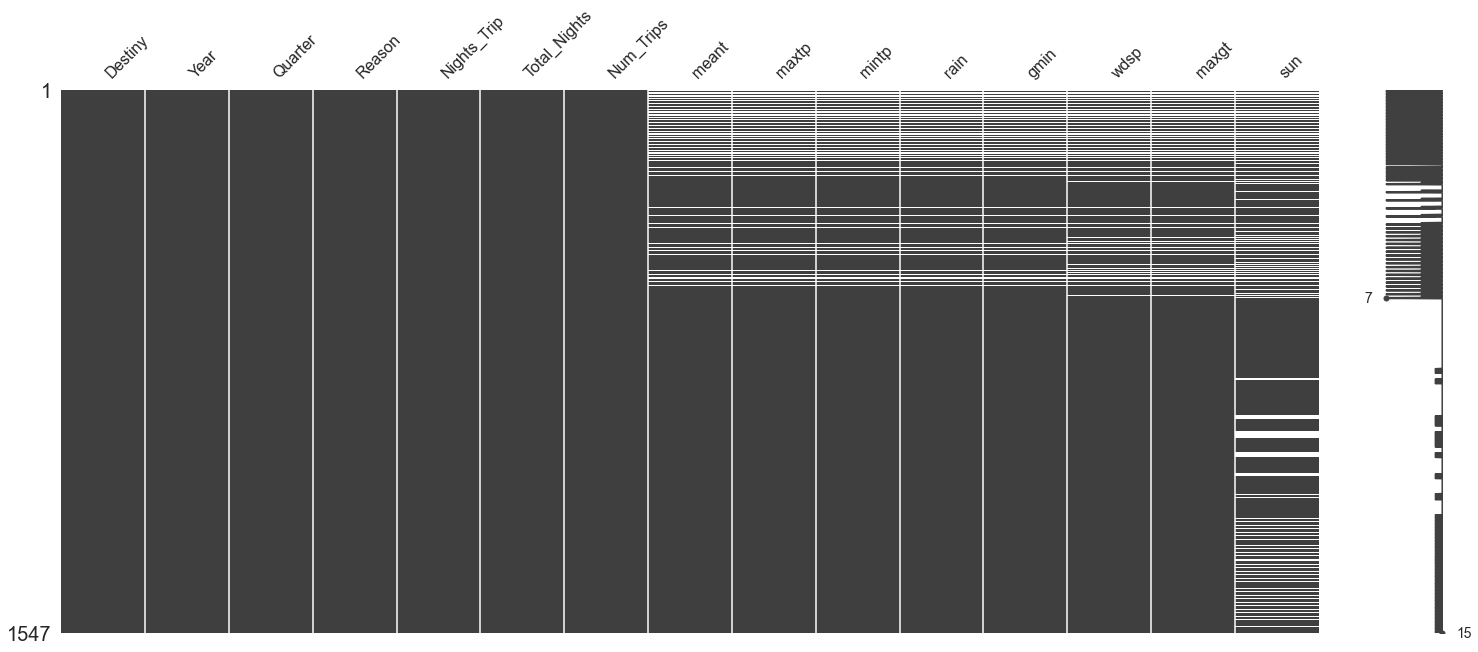

In [31]:
# Plotting Missing Values Graph
msno.matrix(ddt)

In [32]:
# Removing Missing Values
ddt = ddt.dropna()

<AxesSubplot:>

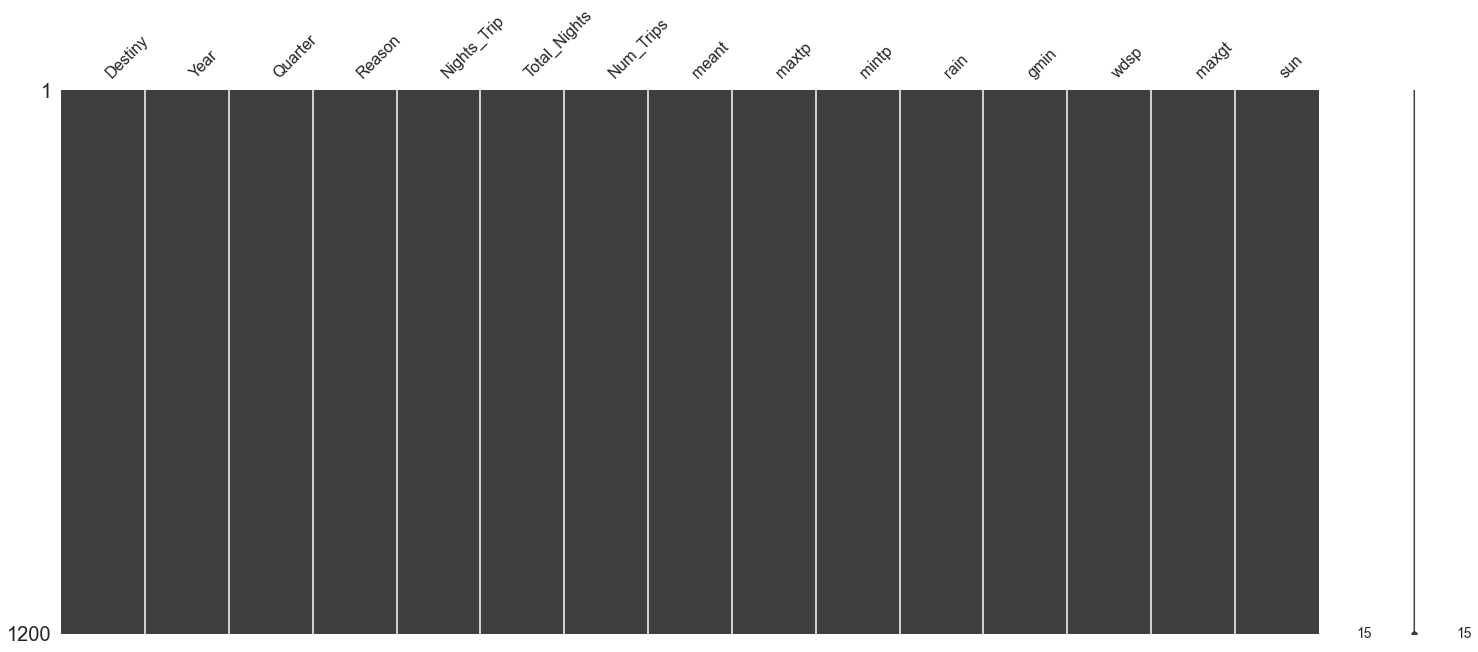

In [33]:
# Plotting Missing Values Graph
msno.matrix(ddt)

In [34]:
# Checking the duplicates rows
duplicates = ddt[ddt.duplicated()]
duplicates.shape

(0, 15)

# Exploratory Data Analysis (EDA)

## - Describing the variables

In [35]:
# Visualizing the dataset
ddt.head()

,Destiny,Year,Quarter,Reason,Nights_Trip,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun
1,Dublin,2003,3,Business,2.3,93.0,41.0,15.466667,25.866667,5.900000,32.333333,3.100000,7.3,34.000000,153.600000
2,Mid-East,2003,3,Business,3.6,29.0,8.0,15.466667,25.866667,5.900000,32.333333,3.100000,7.3,34.000000,153.600000
6,South-West,2003,3,Business,3.5,99.0,28.0,15.300000,22.700000,7.600000,71.966667,4.566667,7.1,31.666667,130.366667
7,State,2003,3,Business,3.0,415.0,140.0,15.466667,25.866667,5.900000,32.333333,3.100000,7.3,34.000000,153.600000
8,West,2003,3,Business,2.5,58.0,23.0,15.133333,23.466667,8.266667,79.633333,5.466667,10.8,44.333333,129.666667


In [36]:
# Checking the variables format
ddt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1 to 1546
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Destiny       1200 non-null   object 
 1   Year          1200 non-null   object 
 2   Quarter       1200 non-null   object 
 3   Reason        1200 non-null   object 
 4   Nights_Trip   1200 non-null   float64
 5   Total_Nights  1200 non-null   float64
 6   Num_Trips     1200 non-null   float64
 7   meant         1200 non-null   float64
 8   maxtp         1200 non-null   float64
 9   mintp         1200 non-null   float64
 10  rain          1200 non-null   float64
 11  gmin          1200 non-null   float64
 12  wdsp          1200 non-null   float64
 13  maxgt         1200 non-null   float64
 14  sun           1200 non-null   float64
dtypes: float64(11), object(4)
memory usage: 150.0+ KB


In [37]:
## Describing numeric variables
ddt.describe()

,Nights_Trip,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,2.723583,1463.627500,504.216667,10.468744,18.096316,1.637293,90.026317,-1.967949,9.842314,45.040995,118.296079
std,0.927732,2138.060264,646.707678,3.255728,4.090246,3.613028,30.184562,3.653066,1.644223,7.613627,47.380881
min,1.100000,6.000000,4.000000,4.233333,11.866667,-5.833333,30.833333,-9.400000,5.094444,29.000000,46.366667
25%,2.100000,209.500000,87.000000,7.650000,14.300000,-1.250000,65.944444,-4.811111,8.733333,39.444444,76.033333
50%,2.500000,611.500000,242.000000,10.308333,17.291667,1.188889,85.470833,-2.400000,9.744444,44.555556,104.700000
75%,3.100000,1739.000000,657.250000,13.716667,21.400000,4.666667,109.425000,1.286667,11.055556,50.166667,159.433333
max,8.400000,14777.000000,4518.000000,16.200000,26.786667,9.888889,188.400000,6.300000,14.233333,72.000000,215.066667


In [38]:
## Describing discrete variables
ddt.describe(include = object)

,Destiny,Year,Quarter,Reason
count,1200,1200,1200,1200
unique,10,19,4,5
top,State,2006,3,Business
freq,355,108,319,243


## - Graphical Analysis

Text(0.5, 1.0, 'Number of Trips')

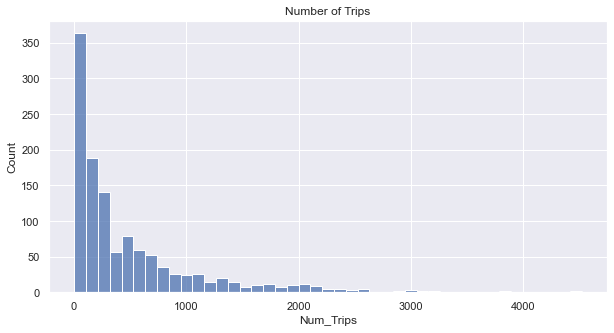

In [39]:
# Plotting the histogram of Number of Trips
plt.figure(figsize=(10,5))
sns.histplot(ddt['Num_Trips'])
plt.title('Number of Trips')

Text(0.5, 1.0, 'Total of Nights')

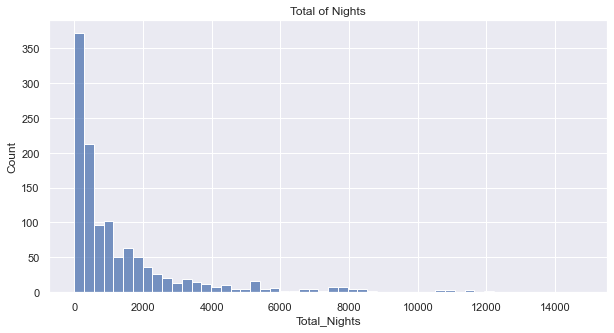

In [40]:
# Plotting the histogram of Number of Nights
plt.figure(figsize=(10,5))
sns.histplot(ddt['Total_Nights'])
plt.title('Total of Nights')

<AxesSubplot:xlabel='rain', ylabel='Count'>

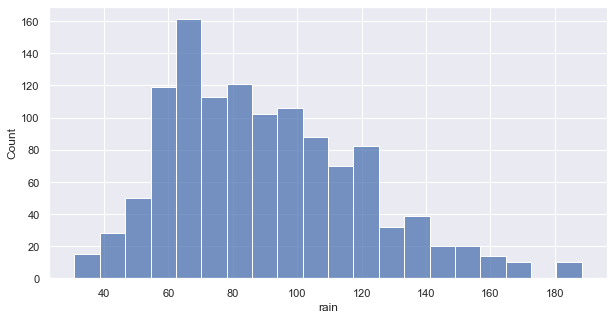

In [41]:
# Plotting the histogram of Rain (Precipitation Amount)
plt.figure(figsize=(10,5))
sns.histplot(ddt['rain'])

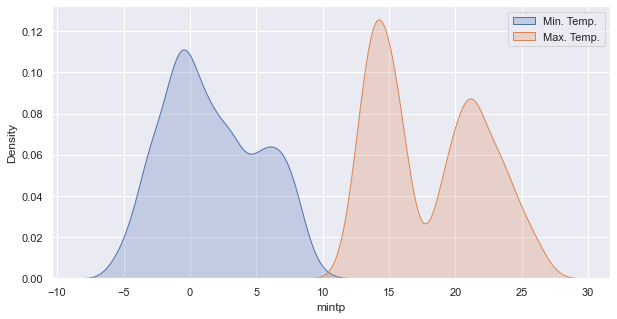

In [42]:
# Plotting the density of Maximum and Minimum Temperatures
plt.figure(figsize=(10,5))
sns.kdeplot(ddt['mintp'],label = 'Min. Temp.',shade = True)
sns.kdeplot(ddt['maxtp'],label = 'Max. Temp.',shade = True)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


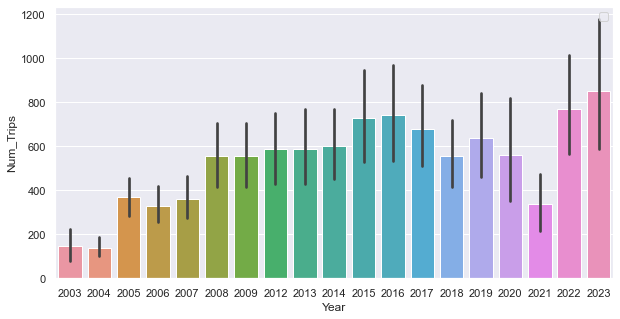

In [43]:
# Plotting the Number of Trips per Year 
plt.figure(figsize=(10,5))
sns.barplot(x = 'Year', y = 'Num_Trips', data = ddt)
plt.title('')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


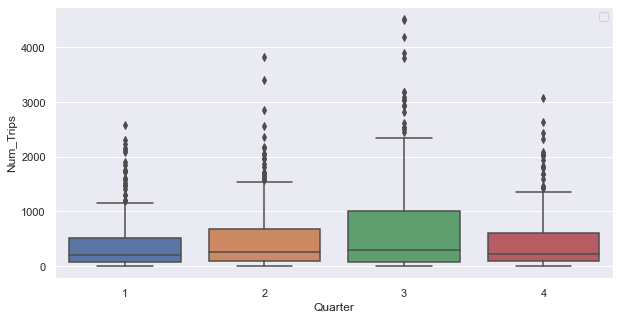

In [44]:
# Plotting the boxplots of Number of Trips per Reason
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Quarter', y = 'Num_Trips', data = ddt)
plt.title('')
plt.legend()

In [45]:
## Describing the Number of Trips variable with Mean per Year and Quarter
q_year_mean = ddt.pivot_table(values = 'Num_Trips', index = 'Year', columns = 'Quarter', aggfunc='mean')
q_year_mean

Quarter,1,2,3,4
Year,,,,
2003,NaN,NaN,165.600000,127.400000
2004,129.400000,121.400000,171.500000,137.050000
2005,220.225806,413.421053,526.631579,408.684211
2006,322.000000,415.789474,343.171429,275.028571
2007,235.085714,295.085714,652.800000,515.200000
2008,493.466667,497.800000,678.466667,553.800000
2009,469.333333,544.466667,669.866667,540.266667
2012,427.400000,520.400000,786.733333,620.600000
2013,403.733333,687.600000,810.466667,483.200000


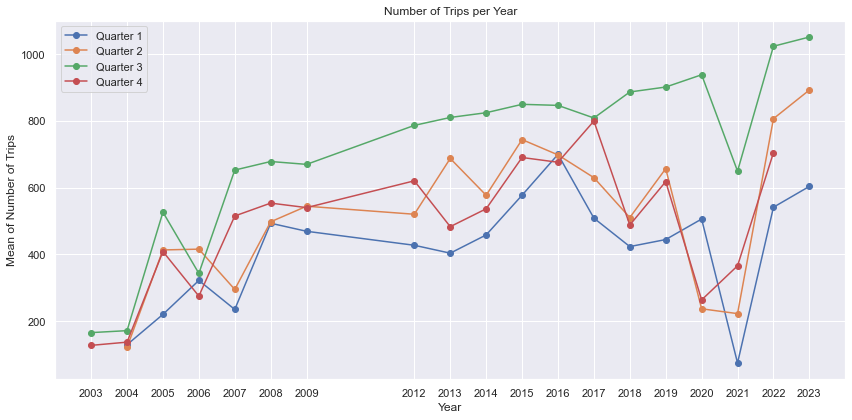

In [46]:
# Plotting a Line Graph of the Number of Trips per Year and Quarter  
plt.figure(figsize=(12, 6))

for quarter in range(1, 5):
    plt.plot(q_year_mean[1].index, q_year_mean[quarter], marker='o', label=f'Quarter {quarter}')

plt.title('Number of Trips per Year')
plt.xlabel('Year')
plt.xticks(q_year_mean[1].index)
plt.ylabel('Mean of Number of Trips')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

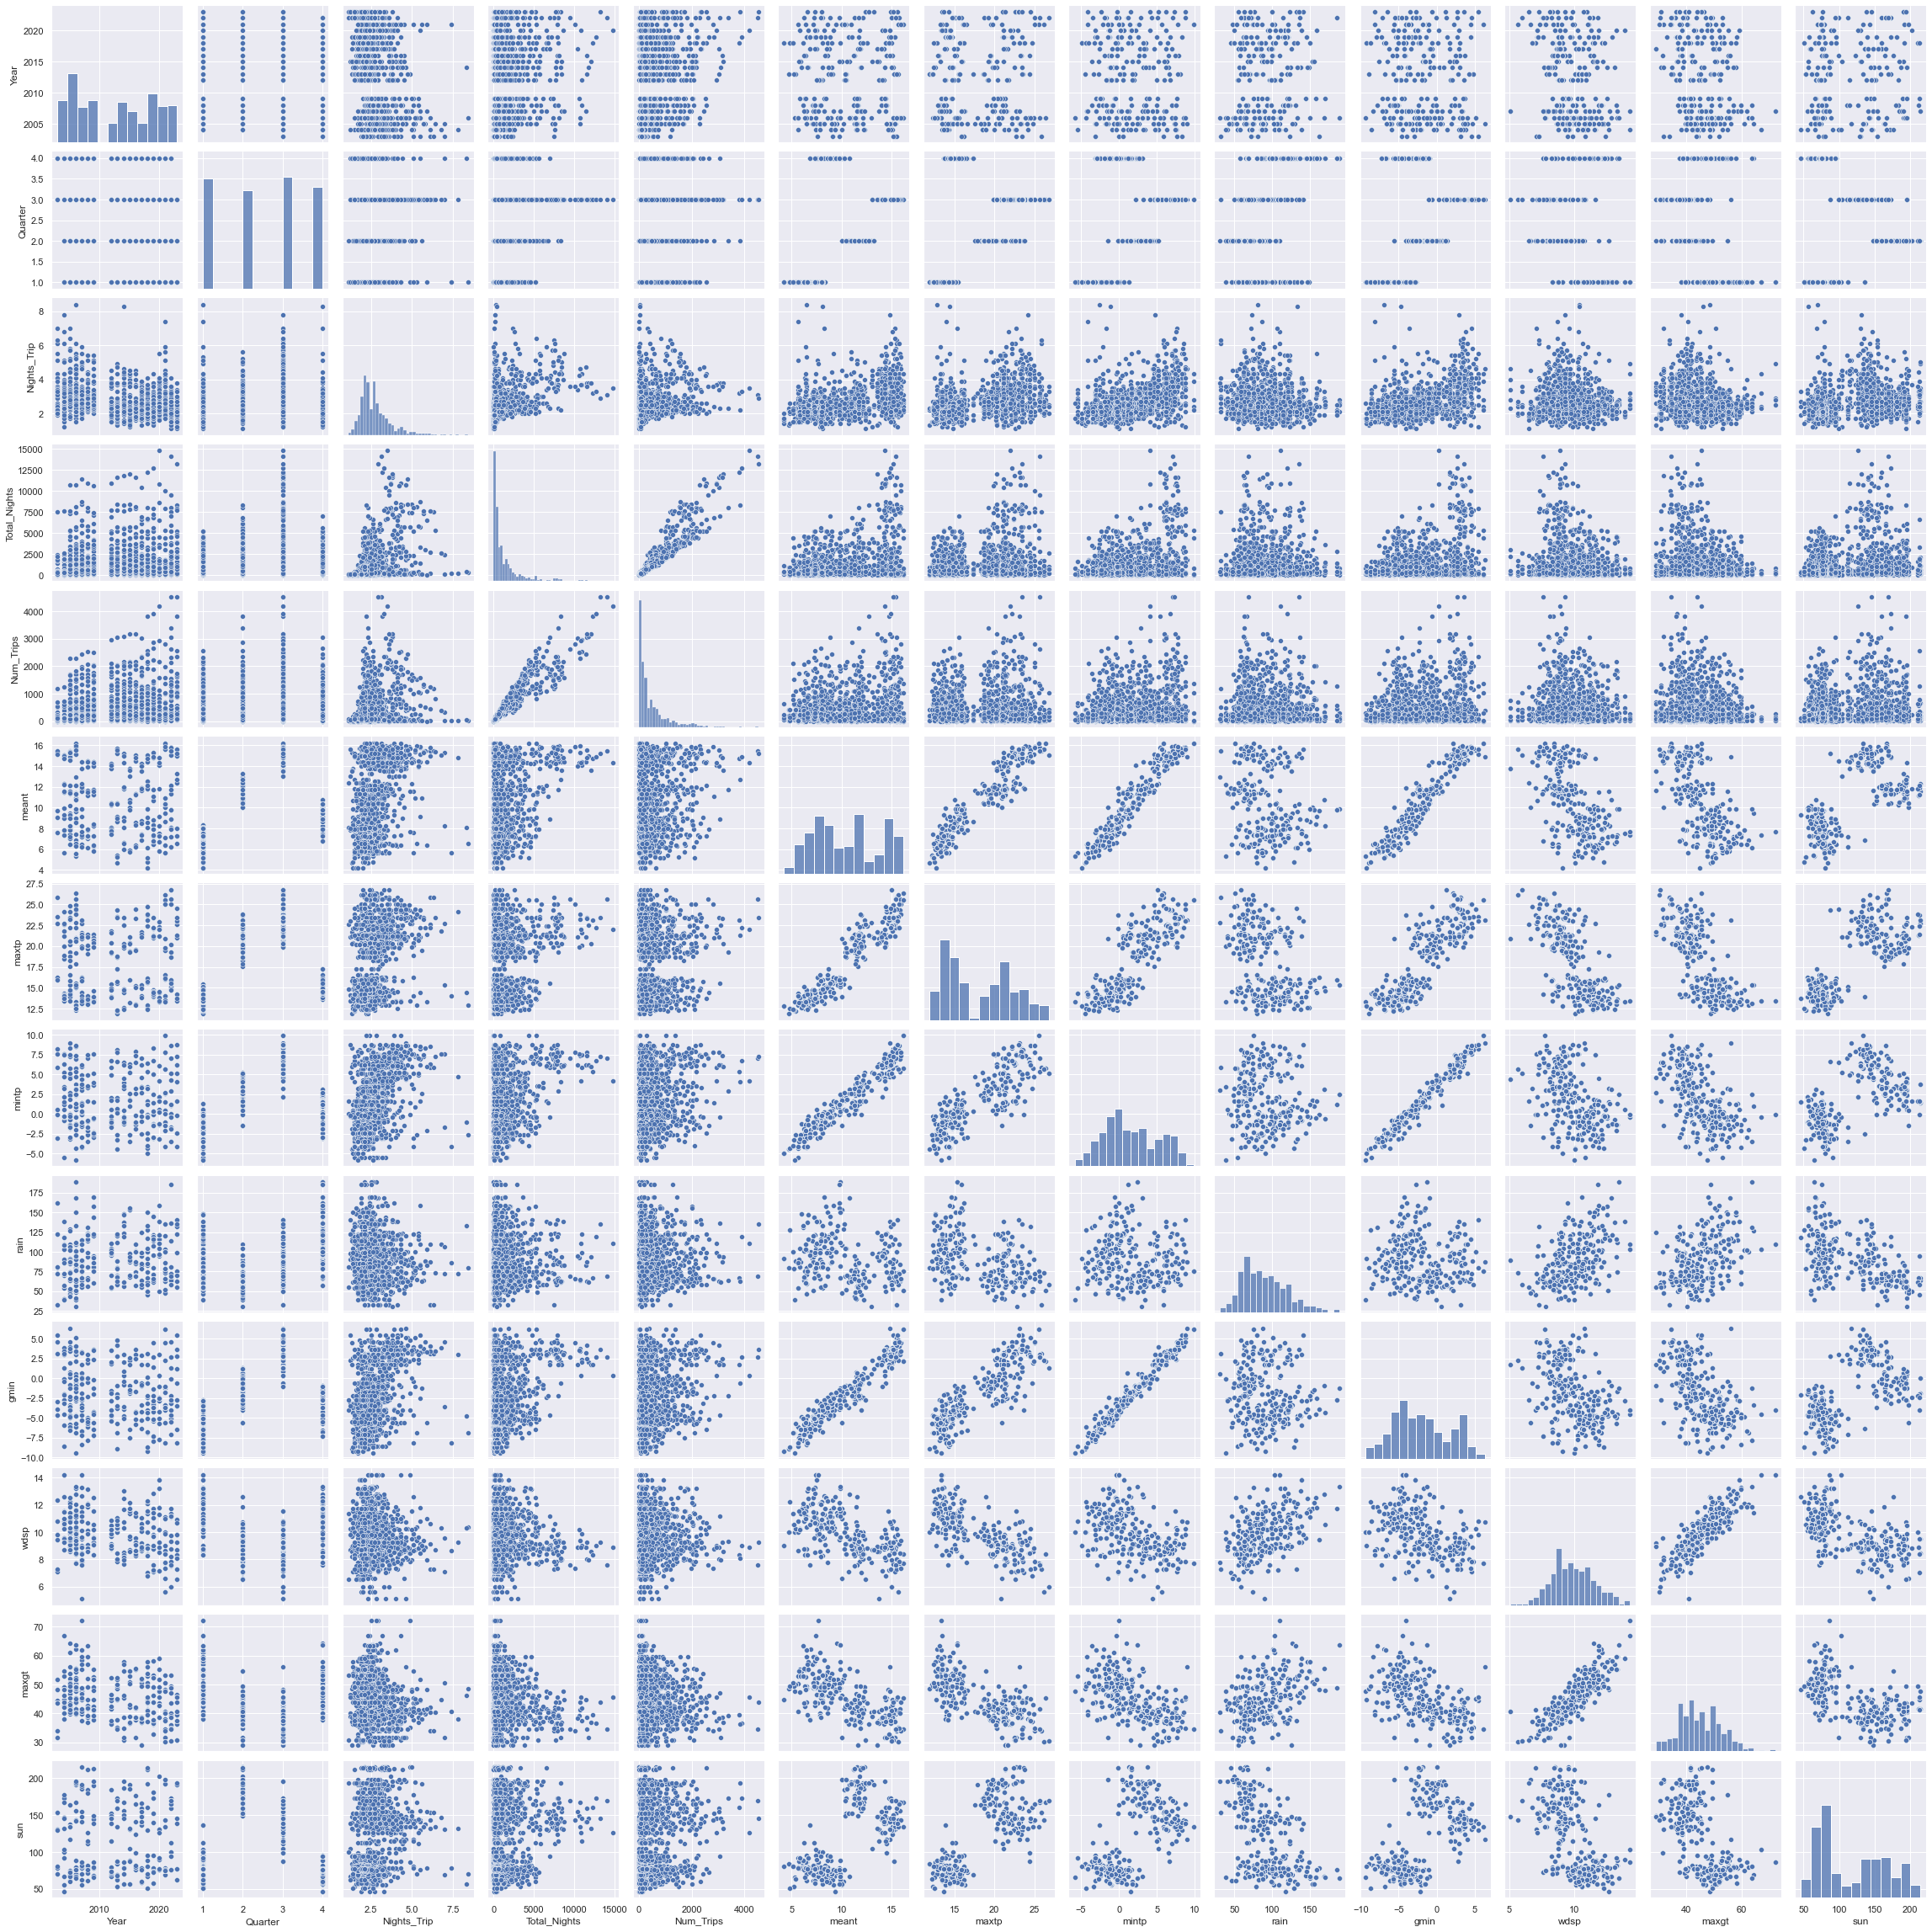

In [47]:
sns.pairplot(ddt)

In [48]:
#import matplotlib.pyplot as plt 

#sns.catplot("cut", data=diamonds_df, aspect=1.5, kind="count", color="b")

#plt.annotate('excellent polish and symmetry ratings;\nreflects almost all the light that enters it',
#             xy=(x,y), xytext=(x+0.3, y+2000), arrowprops=dict(facecolor='red')) 

## - Outliers Analysis

### Outliers in variables Number of Trips and Total Nights

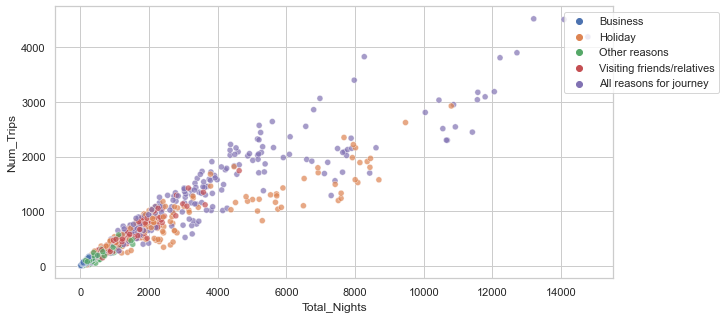

In [49]:
# Change default style
sns.set_style('whitegrid')
# Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=ddt, x='Total_Nights', y='Num_Trips', alpha=0.7, hue='Reason')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));

In [50]:
# Removing Outliers for Number of Trips
Q1 = ddt.Num_Trips.quantile(0.25)
Q3 = ddt.Num_Trips.quantile(0.75)
IQR = Q3 - Q1
ddt_outliers = ddt[(ddt.Num_Trips >= Q1 - 1.5*IQR) & (ddt.Num_Trips <= Q3 + 1.5*IQR)]

In [51]:
# Removing Outliers for Total of Nights
#Q1 = ddt_outliers.Total_Nights.quantile(0.25)
#Q3 = ddt_outliers.Total_Nights.quantile(0.75)
#IQR = Q3 - Q1
#ddt_outliers = ddt_outliers[(ddt_outliers.Total_Nights >= Q1 - 1.5*IQR) & (ddt_outliers.Total_Nights <= Q3 + 1.5*IQR)]

In [52]:
#ddt_outliers = ddt

### Removing COVID-19 Pandemic Effect

Text(0.5, 1.0, '')

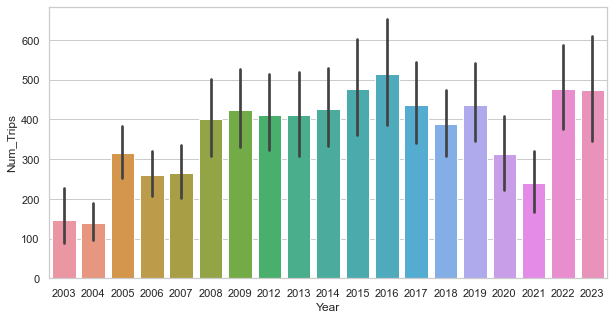

In [53]:
# Plotting the Number of Trips per Year 
plt.figure(figsize=(10,5))
sns.barplot(x = 'Year', y = 'Num_Trips', data = ddt_outliers)
plt.title('')

In [54]:
# Removing Years with Covid-19 Pandemic Effect and other years with outliers values in the trips
ddt_outliers = ddt_outliers.query('Year != 2020 and Year != 2021 and Year != 2003 and Year != 2004' )
ddt_outliers

,Destiny,Year,Quarter,Reason,Nights_Trip,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun
216,"Border, Midland and Western",2005,1,All reasons for journey,3.0,1482.0,501.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000
217,Southern and Eastern,2005,1,All reasons for journey,2.7,2688.0,990.0,7.408333,14.208333,-1.408333,74.266667,-5.033333,11.408333,48.916667,67.377778
218,State,2005,1,All reasons for journey,2.8,4170.0,1490.0,7.183333,13.400000,-1.466667,51.366667,-4.783333,12.533333,48.833333,60.500000
220,"Border, Midland and Western",2005,1,Business,2.5,162.0,65.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000
221,Dublin,2005,1,Business,2.2,100.0,45.0,6.500000,14.500000,-3.166667,46.300000,-6.133333,11.166667,49.333333,60.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,Eastern and Midland,2023,3,Other reasons,1.5,153.0,101.0,14.953333,24.473333,6.173333,131.886667,2.733333,7.286667,37.466667,145.766667
1541,Southern,2023,3,Other reasons,2.5,203.0,82.0,15.611111,23.033333,8.766667,140.822222,5.455556,9.844444,45.555556,138.400000
1542,State,2023,3,Other reasons,2.5,654.0,263.0,15.177778,23.433333,7.255556,134.888889,3.633333,9.288889,43.888889,145.766667
1543,Eastern and Midland,2023,3,Visiting friends/relatives,2.1,1036.0,491.0,14.953333,24.473333,6.173333,131.886667,2.733333,7.286667,37.466667,145.766667


In [55]:
ddt_outliers.describe()

,Nights_Trip,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,2.615045,1046.036199,384.755656,10.270330,17.893885,1.416529,90.923900,-2.203675,9.877607,45.402482,117.984584
std,0.857998,1145.590104,363.866852,3.172050,4.028248,3.491427,29.932091,3.537187,1.600344,7.665540,49.092206
min,1.100000,15.000000,6.000000,4.233333,11.866667,-5.833333,30.833333,-9.400000,5.094444,29.000000,50.600000
25%,2.100000,239.000000,99.000000,7.466667,14.253333,-1.309028,66.613889,-5.000000,8.766667,39.833333,74.600000
50%,2.500000,610.500000,246.500000,9.883333,16.186667,0.988889,85.470833,-2.533333,9.744444,44.700000,97.533333
75%,2.900000,1475.000000,573.000000,12.360000,21.341667,4.000000,110.144444,0.366667,11.116667,50.375000,163.466667
max,8.400000,7593.000000,1494.000000,16.200000,26.786667,8.966667,188.400000,6.300000,14.233333,72.000000,215.066667


In [56]:
ddt.describe()

,Nights_Trip,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,2.723583,1463.627500,504.216667,10.468744,18.096316,1.637293,90.026317,-1.967949,9.842314,45.040995,118.296079
std,0.927732,2138.060264,646.707678,3.255728,4.090246,3.613028,30.184562,3.653066,1.644223,7.613627,47.380881
min,1.100000,6.000000,4.000000,4.233333,11.866667,-5.833333,30.833333,-9.400000,5.094444,29.000000,46.366667
25%,2.100000,209.500000,87.000000,7.650000,14.300000,-1.250000,65.944444,-4.811111,8.733333,39.444444,76.033333
50%,2.500000,611.500000,242.000000,10.308333,17.291667,1.188889,85.470833,-2.400000,9.744444,44.555556,104.700000
75%,3.100000,1739.000000,657.250000,13.716667,21.400000,4.666667,109.425000,1.286667,11.055556,50.166667,159.433333
max,8.400000,14777.000000,4518.000000,16.200000,26.786667,9.888889,188.400000,6.300000,14.233333,72.000000,215.066667


Text(0.5, 1.0, '')

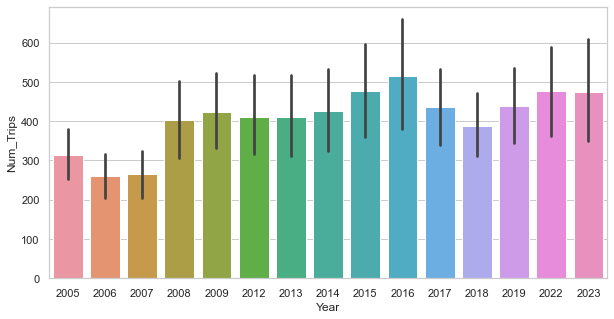

In [57]:
# Plotting the Number of Trips per Year 
plt.figure(figsize=(10,5))
sns.barplot(x = 'Year', y = 'Num_Trips', data = ddt_outliers)
plt.title('')

### Changing the Data without Outliers

In [58]:
ddt = ddt_outliers
ddt

,Destiny,Year,Quarter,Reason,Nights_Trip,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun
216,"Border, Midland and Western",2005,1,All reasons for journey,3.0,1482.0,501.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000
217,Southern and Eastern,2005,1,All reasons for journey,2.7,2688.0,990.0,7.408333,14.208333,-1.408333,74.266667,-5.033333,11.408333,48.916667,67.377778
218,State,2005,1,All reasons for journey,2.8,4170.0,1490.0,7.183333,13.400000,-1.466667,51.366667,-4.783333,12.533333,48.833333,60.500000
220,"Border, Midland and Western",2005,1,Business,2.5,162.0,65.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000
221,Dublin,2005,1,Business,2.2,100.0,45.0,6.500000,14.500000,-3.166667,46.300000,-6.133333,11.166667,49.333333,60.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,Eastern and Midland,2023,3,Other reasons,1.5,153.0,101.0,14.953333,24.473333,6.173333,131.886667,2.733333,7.286667,37.466667,145.766667
1541,Southern,2023,3,Other reasons,2.5,203.0,82.0,15.611111,23.033333,8.766667,140.822222,5.455556,9.844444,45.555556,138.400000
1542,State,2023,3,Other reasons,2.5,654.0,263.0,15.177778,23.433333,7.255556,134.888889,3.633333,9.288889,43.888889,145.766667
1543,Eastern and Midland,2023,3,Visiting friends/relatives,2.1,1036.0,491.0,14.953333,24.473333,6.173333,131.886667,2.733333,7.286667,37.466667,145.766667


# Statistical Analysis

## - Measures

### Mean 

In [59]:
# Calculating the MEAN of Number of Trips,  Number of Nights per Trip and Total of Nights
trips_mean = ddt[['Num_Trips']].mean()
nights_trip_mean = ddt[['Nights_Trip']].mean()
total_nights_mean = ddt[['Total_Nights']].mean()
print(f'Mean of Number of Trips is: {trips_mean}')
print(f'Mean of Number of Nights per Trip is: {nights_trip_mean}')
print(f'Mean of Total of Nights is: {total_nights_mean}')

Mean of Number of Trips is: Num_Trips    384.755656
dtype: float64
Mean of Number of Nights per Trip is: Nights_Trip    2.615045
dtype: float64
Mean of Total of Nights is: Total_Nights    1046.036199
dtype: float64


### Median

In [60]:
# Calculating the MEDIAN of Number of Trips,  Number of Nights per Trip and Total of Nights
trips_mean = ddt[['Num_Trips']].median()
nights_trip_mean = ddt[['Nights_Trip']].median()
total_nights_mean = ddt[['Total_Nights']].median()
print(f'- Median of Number of Trips is: {trips_mean}')
print(f'- Median of Number of Nights per Trip is: {nights_trip_mean}')
print(f'- Median of Total of Nights is: {total_nights_mean}')

- Median of Number of Trips is: Num_Trips    246.5
dtype: float64
- Median of Number of Nights per Trip is: Nights_Trip    2.5
dtype: float64
- Median of Total of Nights is: Total_Nights    610.5
dtype: float64


### Trimmed Mean

In [61]:
# Calculating the Trimmed Mean by dropping 20% of each end
trips_trimean = stats.trim_mean(ddt[['Num_Trips']],0.2)
nights_trip_trimean = stats.trim_mean(ddt[['Nights_Trip']],0.2)
total_nights_trimean = stats.trim_mean(ddt[['Total_Nights']],0.2)
print(f'- Trimmed Mean of Number of Trips is: {trips_trimean}')
print(f'- Trimmed Mean of Number of Nights per Trip is: {nights_trip_trimean}')
print(f'- Trimmed Mean of Total of Nights is: {total_nights_trimean}')

- Trimmed Mean of Number of Trips is: [293.26691729]
- Trimmed Mean of Number of Nights per Trip is: [2.46710526]
- Trimmed Mean of Total of Nights is: [744.37593985]


## - Correlation Analysis

<AxesSubplot:>

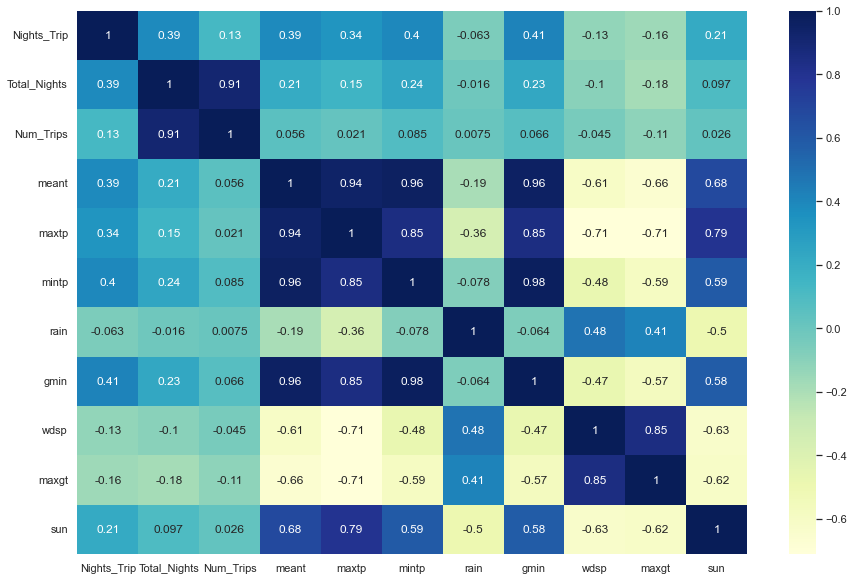

In [62]:
# Plotting the Correlation Matrix
plt.figure(figsize=(15,10))
c = ddt.corr()
sns.heatmap(c,cmap="YlGnBu",annot = True)

## - Data Distribution

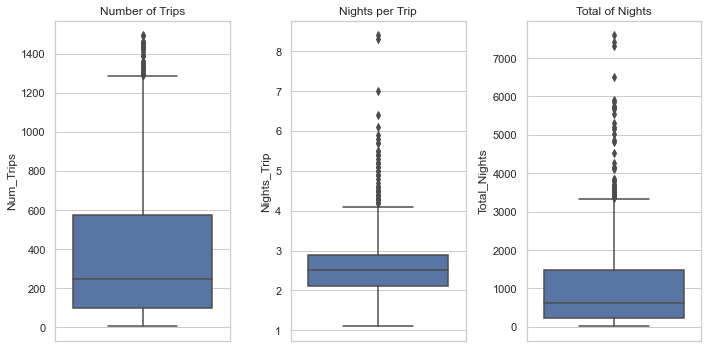

In [63]:
# Plotting boxplots to understand the ocurreency of Outliers in the variables
fig, axs = plt.subplots(1,3,figsize=(10, 5))
sns.boxplot(y='Num_Trips', data=ddt, ax=axs[0])
axs[0].set_title('Number of Trips')
sns.boxplot(y='Nights_Trip', data=ddt, ax=axs[1])
axs[1].set_title('Nights per Trip')
sns.boxplot(y='Total_Nights', data=ddt, ax=axs[2])
axs[2].set_title('Total of Nights')
plt.tight_layout()
plt.show()

In [64]:
#import matplotlib.pyplot as plt 

#sns.catplot("cut", data=diamonds_df, aspect=1.5, kind="count", color="b")

#plt.annotate('excellent polish and symmetry ratings;\nreflects almost all the light that enters it',
#             xy=(x,y), xytext=(x+0.3, y+2000), arrowprops=dict(facecolor='red')) 

Text(0.5, 1.0, 'Total of Nights')

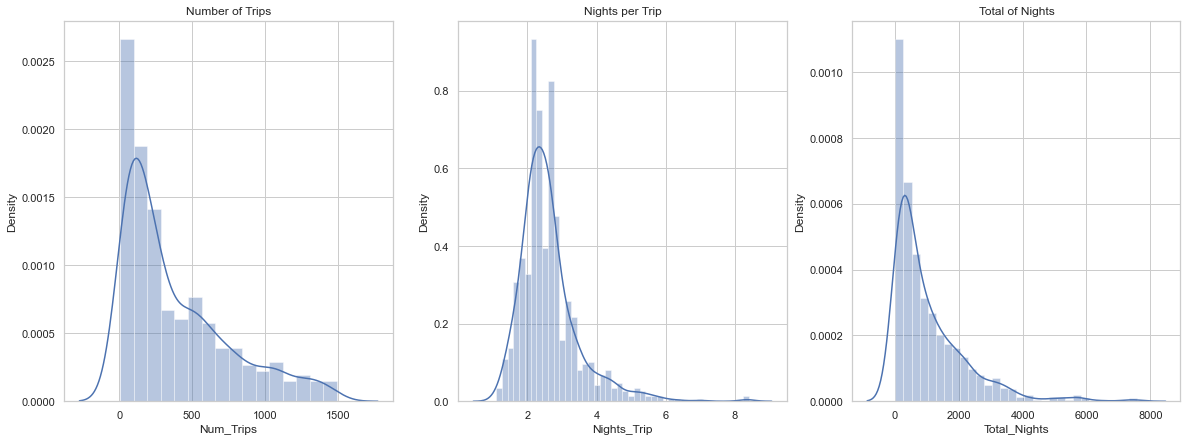

In [65]:
fig, axs = plt.subplots(1,3,figsize=(20, 7))
sns.distplot(ddt['Num_Trips'], hist = True,ax=axs[0])
axs[0].set_title('Number of Trips')
sns.distplot(ddt['Nights_Trip'], hist = True,ax=axs[1])
axs[1].set_title('Nights per Trip')
sns.distplot(ddt['Total_Nights'], hist = True,ax=axs[2])
axs[2].set_title('Total of Nights')

## - Skewness

The thumb rule is:
- If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical.
- If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.
- And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.

Types of Skewness

- **Positive skewness:** In simple words, if the skewness is greater than 0 then the distribution is positively skewed.
- **Negative skewness:** If the skewness is less than 0 then the distribution is negatively skewed.


In [66]:
# Function to define the Skewness
def skewness_define(x,name):
    sk_x = x.skew()
    if sk_x < 0:
        if sk_x > -0.5:
            print(f'The Skewness of {name} is Negative and Fairly Symmetrical: {sk_x}')
        elif sk_x > -1:
            print(f'The Skewness of {name} is Negative and Moderately Skewed: {sk_x}')
        elif sk_x < -1:
            print(f'The Skewness of {name} is Negative and Heavily Skewed: {sk_x}')
    elif sk_x > 0:
        if sk_x < 0.5:
            print(f'The Skewness of {name} is Positive and Fairly Symmetrical: {sk_x}')
        elif sk_x < 1:
            print(f'The Skewness of {name} is Positive and Moderately Skewed: {sk_x}')
        elif sk_x > 1:
            print(f'The Skewness of {name} is Positive and Heavily Skewed: {sk_x}')
    else:
        print(f'The variable {name} is not Skew: {sk_x}')
        

In [67]:
# Checking the skewness of Number of Trips, Nights per Trips and Total of_Nights
skewness_define(ddt['Num_Trips'],'Number of Trips')
skewness_define(ddt['Nights_Trip'],'Number of Nights')
skewness_define(ddt['Total_Nights'],'Total of Nights')

The Skewness of Number of Trips is Positive and Heavily Skewed: 1.1798514936950693
The Skewness of Number of Nights is Positive and Heavily Skewed: 1.9450659186705377
The Skewness of Total of Nights is Positive and Heavily Skewed: 2.079659745457055


In [68]:
# Standard scalee for skew data 

## - Kurtosis

In [69]:
# Checking the Kurtosis of Number of Trips, Nights per Trips and Total of_Nights
trips_kurt = ddt['Num_Trips'].kurtosis()
nights_trip_kurt = ddt['Nights_Trip'].kurtosis()
total_nights_kurt = ddt['Total_Nights'].kurtosis()
print(f'- The Kurtosis of Number of Trips is: {trips_kurt}')
print(f'- The Kurtosis of Number of Nights per Trip is: {nights_trip_kurt}')
print(f'- The Kurtosis of Total of Nights is: {total_nights_kurt}')

- The Kurtosis of Number of Trips is: 0.5334468226441031
- The Kurtosis of Number of Nights per Trip is: 6.721781037345404
- The Kurtosis of Total of Nights is: 5.740111250621173


## - Poisson Distribution

Considering the variables Number of Trips and Total of Nigths, we are going to modelling the variables using the Poisson Distribution. 


### Summarising the variables

####  Number of Trips per Year

In [70]:
# Calculing the mean of Number of Trips that ocurred in the last 10 years
mean_year_trips = ddt.groupby('Year')['Num_Trips'].sum().round(0)
mean_year_trips

Year
2005    26770.0
2006    26715.0
2007    24857.0
2008    21719.0
2009    23328.0
2012    20135.0
2013    20097.0
2014    22979.0
2015    18107.0
2016    20041.0
2017    20508.0
2018    26750.0
2019    25809.0
2022    24726.0
2023    17583.0
Name: Num_Trips, dtype: float64

####  Total of Nights per Year

In [71]:
# Calculing the mean of Number of Trips that ocurred in the last 10 years
mean_year_nights = ddt.groupby('Year')['Total_Nights'].sum().round(0)
mean_year_nights

Year
2005    92567.0
2006    84617.0
2007    73890.0
2008    62948.0
2009    70969.0
2012    54114.0
2013    52458.0
2014    62267.0
2015    47383.0
2016    51007.0
2017    52378.0
2018    63491.0
2019    59097.0
2022    58753.0
2023    38757.0
Name: Total_Nights, dtype: float64

<AxesSubplot:xlabel='Total_Nights', ylabel='Density'>

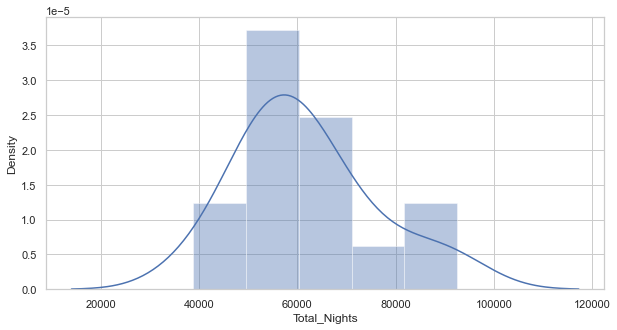

In [72]:
# Plotting the histogram for the means of Total of Nights per year
plt.figure(figsize=(10,5))
sns.distplot(mean_year_nights)

### Poisson Distribution for Number of Trips

#### Parameters of the distribution

In [73]:
# Calculing the mean of previous years and defining lambda
mean_year_lambda_trips = mean_year_trips.mean()

#### Adjusting the distribution

In [74]:
# Adjusting the Poisson Distribution based on the average of lambdas from previous years
dist_previous_poisson_trips = poisson(mu = mean_year_lambda_trips)

In [75]:
mean_year_lambda_trips

22674.933333333334

#### - Estimating the Probabilities of the Distribution

- Estimating the probability of the Number of Trips in 2024 be more than 23k.

In [76]:
1 - dist_previous_poisson_trips.cdf(23000)

0.015463254074295385

- Estimating the probability of the Number of Trips in 2024 be at least 23k.

In [77]:
dist_previous_poisson_trips.cdf(23000)

0.9845367459257046

- Estimating the probability of the Number of Trips in 2024 be less than 22.5k.

In [78]:
dist_previous_poisson_trips.cdf(22500)

0.12327370978794915

### Poisson Distribution for Total of Nights

#### Parameters of the distribution

In [79]:
# Calculing the mean of previous years and defining lambda
mean_year_lambda_nights = mean_year_nights.mean()

#### Adjusting the distribution

In [80]:
# Adjusting the Poisson Distribution based on the average of lambdas from previous years
dist_previous_poisson_nights = poisson(mu = mean_year_lambda_nights)

In [81]:
mean_year_lambda_nights

61646.4

#### Estimating the Probabilities of the Distribution

- Estimating the probability of the Total of Nights of Trips in 2024 be more than 62k.

In [82]:
1 - dist_previous_poisson_nights.cdf(62000)

0.07700909289334601

- Estimating the probability of the Total of Nights of Trips in 2024 be less than 62k.

In [83]:
dist_previous_poisson_nights.cdf(62000)

0.922990907106654

- Estimating the probability of the Total of Nights of Trips in 2024 be less than 61k.

In [84]:
dist_previous_poisson_nights.cdf(61000)

0.004589478952748032

## - Binomial Distribution

### Summarizing the variables

In [85]:
## Using the same variables previously created
print(f'MEAN OF NUMBER OF TRIPS PER YEAR \n {mean_year_trips}')
print('------------------------------------')
print(f'MEAN OF TOTAL OF NIGHTS PER YEAR \n {mean_year_nights}')

MEAN OF NUMBER OF TRIPS PER YEAR 
 Year
2005    26770.0
2006    26715.0
2007    24857.0
2008    21719.0
2009    23328.0
2012    20135.0
2013    20097.0
2014    22979.0
2015    18107.0
2016    20041.0
2017    20508.0
2018    26750.0
2019    25809.0
2022    24726.0
2023    17583.0
Name: Num_Trips, dtype: float64
------------------------------------
MEAN OF TOTAL OF NIGHTS PER YEAR 
 Year
2005    92567.0
2006    84617.0
2007    73890.0
2008    62948.0
2009    70969.0
2012    54114.0
2013    52458.0
2014    62267.0
2015    47383.0
2016    51007.0
2017    52378.0
2018    63491.0
2019    59097.0
2022    58753.0
2023    38757.0
Name: Total_Nights, dtype: float64


### Variable Number of Trips

#### Parameters of the distribution

In [86]:
n_trips = mean_year_trips.sum()
p_trips = mean_year_trips.mean() / n_trips

#### Adjusting the distribution

In [87]:
binom_trips = stats.binom(n_trips,p_trips)

#### Estimating the expected number from the distribution

- Estimating the expected number of trips in 2024.

In [88]:
year = 2024
trips_2024 = binom_trips.mean()

In [89]:
trips_2024

22674.933333333334

### Variable Total of Nights

#### Parameters of the distribution

In [90]:
n_nights = mean_year_nights.sum()
p_nights = mean_year_nights.mean() / n_nights

#### Adjusting the distribution

In [91]:
binom_nights = stats.binom(n_nights,p_nights)

#### Estimating the expected number from the distribution

- Estimating the expected total number of travel nights in 2024.

In [92]:
year = 2024
nights_2024 = binom_nights.mean()

In [93]:
nights_2024

61646.4

## - The Central Limit Theorem

### Variables Distribution

Considering the variables previously calculated:

    - Mean of Number of Trips per Year
    - Mean of Total of Nights per Year



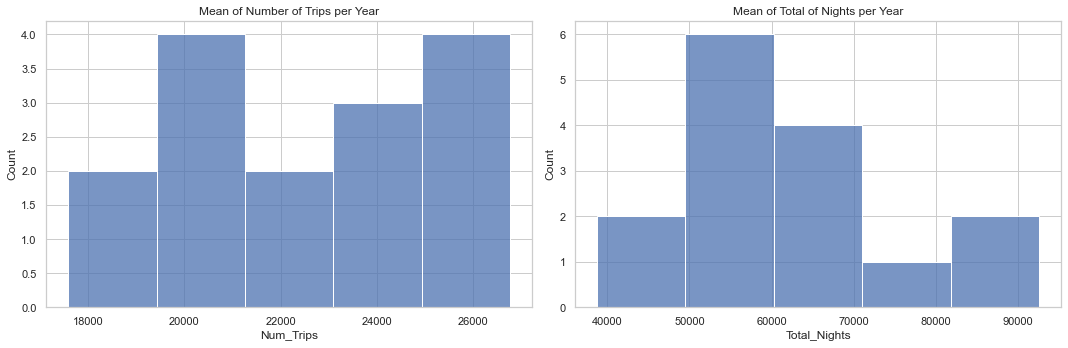

In [94]:
# Plotting the graph of variables
fig, axes = plt.subplots(1,2,figsize = (15,5))
sns.histplot(mean_year_trips, ax = axes[0])
axes[0].set_title('Mean of Number of Trips per Year')
sns.histplot(mean_year_nights, ax = axes[1])
axes[1].set_title('Mean of Total of Nights per Year')
plt.tight_layout()

### Parameters

In [95]:
## Variable Number of Trips

# Poisson Variables
print(f'The parameters of the variable Mean of NUMBER OF TRIPS per Year is:')
print(f'  Poisson Distribution:')
print(f'      - Lambda: {mean_year_lambda_trips}') 
print('------------------------------------------') 
print(f'  Binomial Distribution:')
print(f'      - n: {n_trips}') 
print(f'      - p: {p_trips}') 
print('------------------------------------------') 
print('------------------------------------------') 
print('------------------------------------------') 
print(f'The parameters of the variable Mean of TOTAL OF NIGHTS per Year is:')
print(f'  Poisson Distribution:')
print(f'      - Lambda: {mean_year_lambda_nights}') 
print('------------------------------------------') 
print(f'  Binomial Distribution:')
print(f'      - n: {n_nights}') 
print(f'      - p: {p_nights}') 

The parameters of the variable Mean of NUMBER OF TRIPS per Year is:
  Poisson Distribution:
      - Lambda: 22674.933333333334
------------------------------------------
  Binomial Distribution:
      - n: 340124.0
      - p: 0.06666666666666667
------------------------------------------
------------------------------------------
------------------------------------------
The parameters of the variable Mean of TOTAL OF NIGHTS per Year is:
  Poisson Distribution:
      - Lambda: 61646.4
------------------------------------------
  Binomial Distribution:
      - n: 924696.0
      - p: 0.06666666666666667


### Generating Random Samples for the Variables

Generating samples with different number of observations considering the parameters and the distributions Poisson and Binomial for the variables 

In [96]:
random.seed(199)

In [97]:
# Defining the n of the samples
n_samples = [20,50,100,500]

In [98]:

list_trips_binom= []
list_trips_poisson = []
list_nights_binom= []
list_nights_poisson = []
for i in n_samples:
    samples_trips_binom = np.random.binomial(n_trips,p_trips, size = (1,i))
    samples_trips_pois = np.random.poisson(mean_year_lambda_trips, size = (1,i))
    samples_nights_binom = np.random.binomial(n_nights,p_nights, size = (1,i))
    samples_nights_pois = np.random.poisson(mean_year_lambda_nights, size = (1,i))
    list_trips_binom.append(samples_trips_binom)
    list_trips_poisson.append(samples_trips_pois)
    list_nights_binom.append(samples_nights_binom)
    list_nights_poisson.append(samples_nights_pois)

#### Number of Trips - Samples Generated with Binomial Distribution

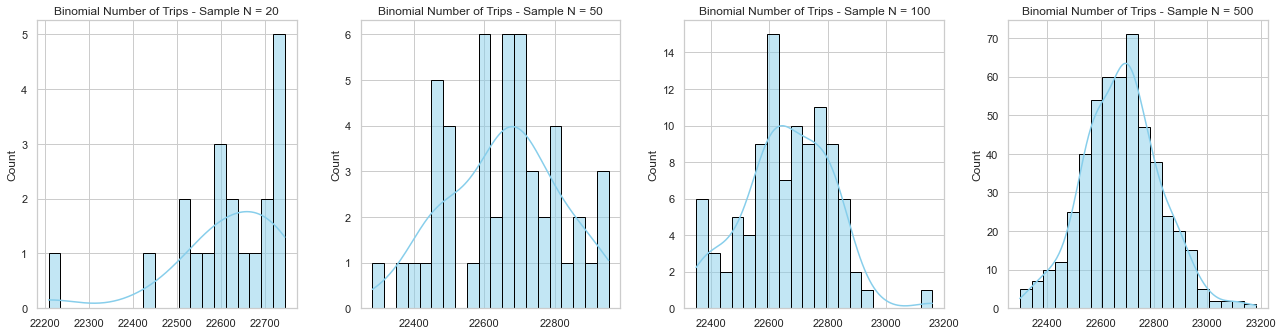

In [99]:
plt.figure(figsize=(18,9))

for i, sample in enumerate(list_trips_binom):
    plt.subplot(2,len(list_trips_binom),i+1)
    sns.histplot(sample.flatten(), bins=20, color='skyblue', edgecolor='black', kde=True)
    #plt.hist(sample.flatten(),bins = 20, color = 'skyblue',edgecolor = 'black')
    plt.title(f'Binomial Number of Trips - Sample N = {n_samples[i]}')

plt.tight_layout()

#### Number of Trips - Samples Generated with Poisson Distribution

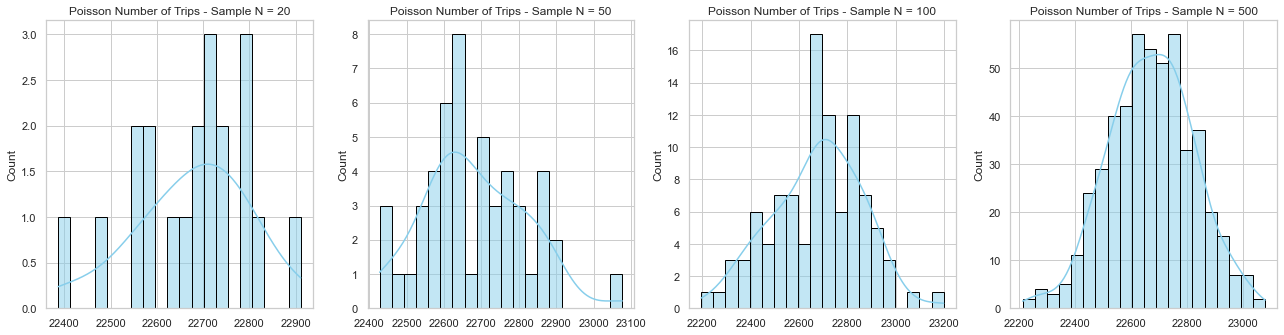

In [100]:
plt.figure(figsize=(18,9))

for i, sample in enumerate(list_trips_poisson):
    plt.subplot(2,len(list_trips_poisson),i+1)
    sns.histplot(sample.flatten(), bins=20, color='skyblue', edgecolor='black', kde=True)
    #plt.hist(sample.flatten(),bins = 20, color = 'skyblue',edgecolor = 'black')
    plt.title(f'Poisson Number of Trips - Sample N = {n_samples[i]}')

plt.tight_layout()

#### Total of Nights - Samples Generated with Binomial Distribution

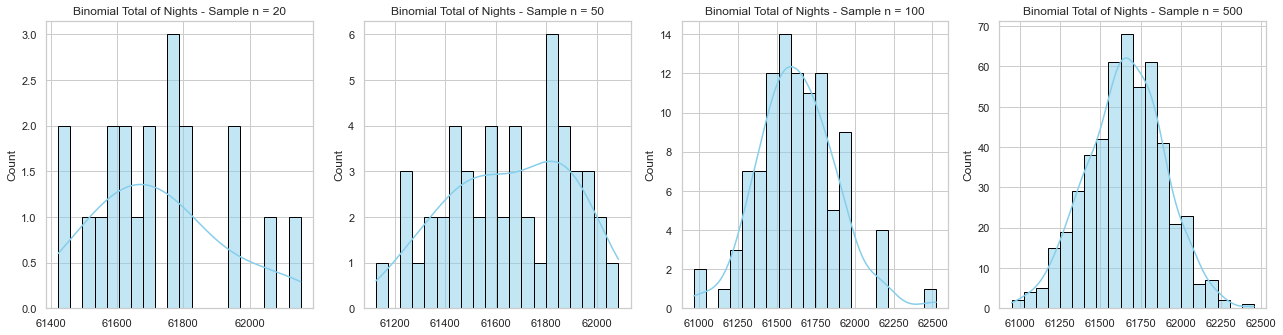

In [101]:
plt.figure(figsize=(18,9))

for i, sample in enumerate(list_nights_binom):
    plt.subplot(2,len(list_nights_binom),i+1)
    sns.histplot(sample.flatten(), bins=20, color='skyblue', edgecolor='black', kde=True)
    #plt.hist(sample.flatten(),bins = 20, color = 'skyblue',edgecolor = 'black')
    plt.title(f'Binomial Total of Nights - Sample n = {n_samples[i]}')

plt.tight_layout()

#### Total of Nights - Samples Generated with Poisson Distribution

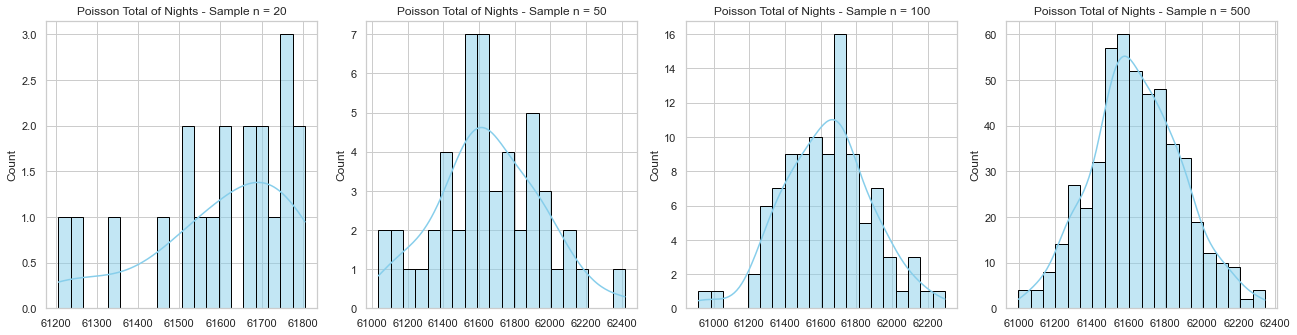

In [102]:
plt.figure(figsize=(18,9))

for i, sample in enumerate(list_nights_poisson):
    plt.subplot(2,len(list_nights_poisson),i+1)
    sns.histplot(sample.flatten(), bins=20, color='skyblue', edgecolor='black', kde=True)
    #plt.hist(sample.flatten(),bins = 20, color = 'skyblue',edgecolor = 'black')
    plt.title(f'Poisson Total of Nights - Sample n = {n_samples[i]}')

plt.tight_layout()

## - Normal Distribution

### - Nights per Trip - Checking the Distribution of the Variable

<AxesSubplot:xlabel='Nights_Trip', ylabel='Density'>

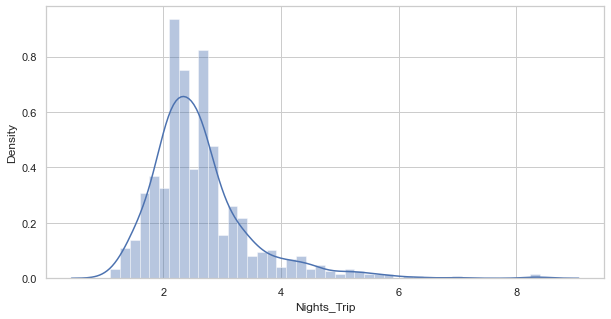

In [103]:
# Plotting the histogram of the variable Nights per Trip
plt.figure(figsize=(10,5))
sns.distplot(ddt['Nights_Trip'])

### - Applying Log-Transformation

In [104]:
# Using log transformation to transform in a symmetric variable
Nights_Trip_log = np.log(ddt['Nights_Trip'])

<AxesSubplot:xlabel='Nights_Trip', ylabel='Density'>

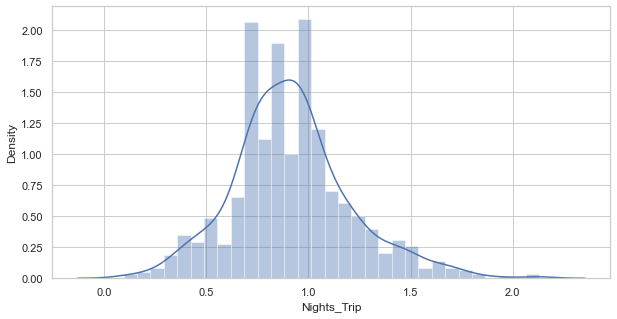

In [105]:
plt.figure(figsize=(10,5))
sns.distplot(Nights_Trip_log)

### - Parameters of the distribution

In [106]:
mean_nights_trip = ddt.groupby('Year')['Nights_Trip'].mean().mean()
std_nights_trip = ddt.groupby('Year')['Nights_Trip'].std().mean()

In [107]:
std_nights_trip

0.7241540584538263

### - Adjusting the distribution

In [108]:
nights_trip_normal = norm(loc = mean_nights_trip, scale = std_nights_trip)

### - Estimating the Probabilities of the Distribution

- Estimating the probability of the number of nights be more than 3 per trip in 2024 

In [109]:
### Using the variable Nights per Trip with log-transformation
prob_nights_trip_2024 = 1 - nights_trip_normal.cdf(3)
prob_nights_trip_2024

0.26162035831838004

- Estimating the probability of the number of nights be more than 4 per trip in 2024 

In [110]:
### Using the variable Nights per Trip with log-transformation
prob_nights_trip_2024 = 1 - nights_trip_normal.cdf(4)
prob_nights_trip_2024

0.021729086285877552

- Estimating the probability of the number of nights be less than 2 per trip in 2024 

In [111]:
### Using the variable Nights per Trip with log-transformation
prob_nights_trip_2024 = nights_trip_normal.cdf(2)
prob_nights_trip_2024

0.22887293432963463

# Machine Learning - Feature Engineering

## - Feature Engineer for Regression 

### Creating some interactions betwen the variables

In [112]:
ddt.head()

,Destiny,Year,Quarter,Reason,Nights_Trip,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun
216,"Border, Midland and Western",2005,1,All reasons for journey,3.0,1482.0,501.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000
217,Southern and Eastern,2005,1,All reasons for journey,2.7,2688.0,990.0,7.408333,14.208333,-1.408333,74.266667,-5.033333,11.408333,48.916667,67.377778
218,State,2005,1,All reasons for journey,2.8,4170.0,1490.0,7.183333,13.400000,-1.466667,51.366667,-4.783333,12.533333,48.833333,60.500000
220,"Border, Midland and Western",2005,1,Business,2.5,162.0,65.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000
221,Dublin,2005,1,Business,2.2,100.0,45.0,6.500000,14.500000,-3.166667,46.300000,-6.133333,11.166667,49.333333,60.500000


In [113]:
# Removing a column not necessary for the analysis
dd_reg = ddt.drop(columns = ['Nights_Trip'])

In [114]:
# Creating interactions between variables to understand the effect
dd_reg['maxmin'] = dd_reg['maxtp'] * dd_reg['mintp']
dd_reg['min_wind'] = dd_reg['mintp'] * dd_reg['wdsp']
dd_reg['rain_wind'] = dd_reg['rain'] * dd_reg['wdsp']
dd_reg['gmin_temp'] = dd_reg['gmin'] * dd_reg['meant']

<AxesSubplot:>

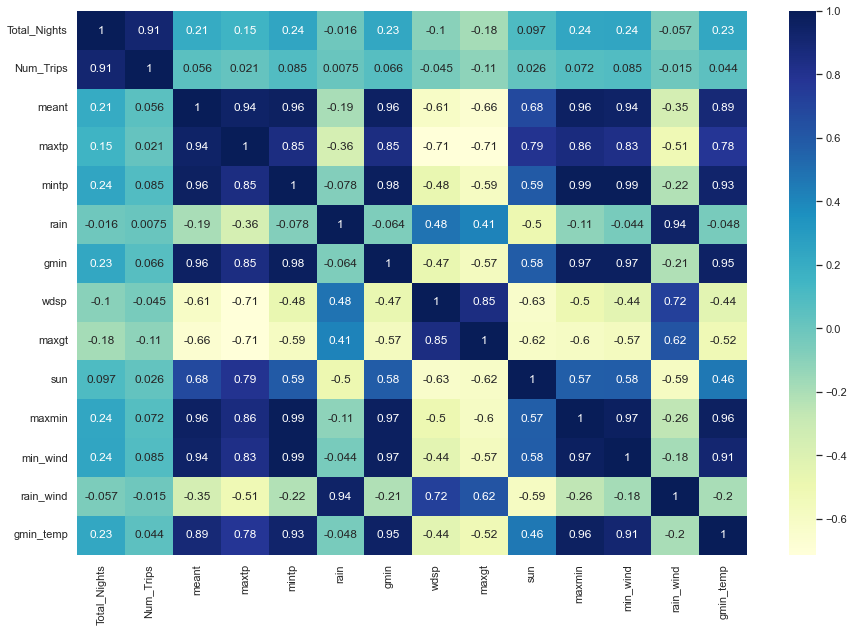

In [115]:
# Plotting the Correlation Matrix
plt.figure(figsize=(15,10))
c = dd_reg.corr()
sns.heatmap(c,cmap="YlGnBu",annot = True)

### Encoding variables

In [116]:
## Transforming variables Year and Quarter in numeric
dd_reg[['Year','Quarter']] = dd_reg[['Year','Quarter']].astype('int64')
dd_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 216 to 1545
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Destiny       884 non-null    object 
 1   Year          884 non-null    int64  
 2   Quarter       884 non-null    int64  
 3   Reason        884 non-null    object 
 4   Total_Nights  884 non-null    float64
 5   Num_Trips     884 non-null    float64
 6   meant         884 non-null    float64
 7   maxtp         884 non-null    float64
 8   mintp         884 non-null    float64
 9   rain          884 non-null    float64
 10  gmin          884 non-null    float64
 11  wdsp          884 non-null    float64
 12  maxgt         884 non-null    float64
 13  sun           884 non-null    float64
 14  maxmin        884 non-null    float64
 15  min_wind      884 non-null    float64
 16  rain_wind     884 non-null    float64
 17  gmin_temp     884 non-null    float64
dtypes: float64(14), int64(2), o

In [117]:
ddcod = dd_reg
# = pd.get_dummies(dd_reg,columns = ['Destiny'])
#ddcod.columns

In [118]:
# Encoding the variables Destiny and Reason

label_encoder = LabelEncoder()
ddcod['Destiny'] = label_encoder.fit_transform(ddcod['Destiny'])
ddcod['Reason'] = label_encoder.fit_transform(ddcod['Reason'])

### Splitting the Data

In [119]:
# Reordering the columns
#total_nights = ddcod.pop('Total_Nights')
#ddcod['Total_Nights'] = total_nights

num_trips = ddcod.pop('Num_Trips')
ddcod['Num_Trips'] = num_trips
#dd_lr = ddcod.drop(columns = ['Destiny','Reason'])
dd_lr = ddcod
dd_lr.columns

Index(['Destiny', 'Year', 'Quarter', 'Reason', 'Total_Nights', 'meant',
       'maxtp', 'mintp', 'rain', 'gmin', 'wdsp', 'maxgt', 'sun', 'maxmin',
       'min_wind', 'rain_wind', 'gmin_temp', 'Num_Trips'],
      dtype='object')

In [120]:
# Defining the variables
X = dd_lr.iloc[:, :-1]
y = dd_lr['Num_Trips']

In [121]:
# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((884, 17), (884,), (618, 17), (266, 17), (618,), (266,))

### Feature Importance for ML

In [122]:
clf = RandomForestClassifier(n_estimators = 100)

In [123]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [124]:
feature_imp = pd.Series(clf.feature_importances_,index = X.columns).sort_values(ascending=False)
feature_imp

Total_Nights    0.195999
Reason          0.134233
rain            0.056313
sun             0.055269
maxgt           0.055119
wdsp            0.052640
rain_wind       0.052132
maxtp           0.050219
gmin_temp       0.047934
meant           0.044872
maxmin          0.044070
gmin            0.043752
min_wind        0.042984
Year            0.042370
mintp           0.040352
Destiny         0.029725
Quarter         0.012017
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


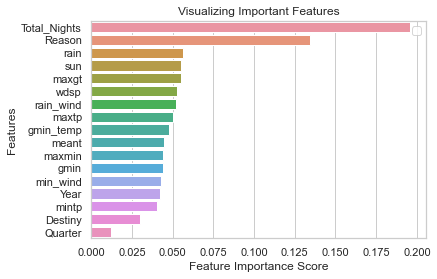

In [125]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Feature Engineer for Classification

In [126]:
ddt.head()

,Destiny,Year,Quarter,Reason,Nights_Trip,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun
216,"Border, Midland and Western",2005,1,All reasons for journey,3.0,1482.0,501.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000
217,Southern and Eastern,2005,1,All reasons for journey,2.7,2688.0,990.0,7.408333,14.208333,-1.408333,74.266667,-5.033333,11.408333,48.916667,67.377778
218,State,2005,1,All reasons for journey,2.8,4170.0,1490.0,7.183333,13.400000,-1.466667,51.366667,-4.783333,12.533333,48.833333,60.500000
220,"Border, Midland and Western",2005,1,Business,2.5,162.0,65.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000
221,Dublin,2005,1,Business,2.2,100.0,45.0,6.500000,14.500000,-3.166667,46.300000,-6.133333,11.166667,49.333333,60.500000


In [127]:
# Removing a column not necessary for the analysis
dd_class = ddt.drop(columns = ['Nights_Trip'])

### Encoding variables

#### Transforming variables

In [128]:
## Transforming variables Year and Quarter in numeric
dd_class[['Year','Quarter']] = dd_class[['Year','Quarter']].astype('int64')
dd_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 216 to 1545
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Destiny       884 non-null    object 
 1   Year          884 non-null    int64  
 2   Quarter       884 non-null    int64  
 3   Reason        884 non-null    object 
 4   Total_Nights  884 non-null    float64
 5   Num_Trips     884 non-null    float64
 6   meant         884 non-null    float64
 7   maxtp         884 non-null    float64
 8   mintp         884 non-null    float64
 9   rain          884 non-null    float64
 10  gmin          884 non-null    float64
 11  wdsp          884 non-null    float64
 12  maxgt         884 non-null    float64
 13  sun           884 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 103.6+ KB


In [129]:
# Encoding the variables Destiny and Reason

label_encoder = LabelEncoder()
dd_class['Destiny'] = label_encoder.fit_transform(dd_class['Destiny'])
dd_class['Reason'] = label_encoder.fit_transform(dd_class['Reason'])
dd_class

,Destiny,Year,Quarter,Reason,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun
216,0,2005,1,0,1482.0,501.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000
217,7,2005,1,0,2688.0,990.0,7.408333,14.208333,-1.408333,74.266667,-5.033333,11.408333,48.916667,67.377778
218,8,2005,1,0,4170.0,1490.0,7.183333,13.400000,-1.466667,51.366667,-4.783333,12.533333,48.833333,60.500000
220,0,2005,1,1,162.0,65.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000
221,1,2005,1,1,100.0,45.0,6.500000,14.500000,-3.166667,46.300000,-6.133333,11.166667,49.333333,60.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,2,2023,3,3,153.0,101.0,14.953333,24.473333,6.173333,131.886667,2.733333,7.286667,37.466667,145.766667
1541,6,2023,3,3,203.0,82.0,15.611111,23.033333,8.766667,140.822222,5.455556,9.844444,45.555556,138.400000
1542,8,2023,3,3,654.0,263.0,15.177778,23.433333,7.255556,134.888889,3.633333,9.288889,43.888889,145.766667
1543,2,2023,3,4,1036.0,491.0,14.953333,24.473333,6.173333,131.886667,2.733333,7.286667,37.466667,145.766667


#### Splitting Number of Trips by classes

In [130]:
# Calculing the Quartis
quantil_25 = dd_class['Num_Trips'].quantile(0.25) 
quantil_50 = dd_class['Num_Trips'].quantile(0.50) 
quantil_75 = dd_class['Num_Trips'].quantile(0.75) 

In [131]:
# Defining the intervals and class labels basedin the Quartis
intervals = [0, quantil_25, quantil_50, quantil_75 , float('inf')]
labels = ['Low','Medium', 'High', 'Very High']


In [132]:
# Defining the classes
trip_classes = pd.cut(dd_class["Num_Trips"], bins=intervals, labels=labels)

In [133]:
# Join the Variable Classes
dd_class['trip_classes'] = trip_classes
dd_class

,Destiny,Year,Quarter,Reason,Total_Nights,Num_Trips,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun,trip_classes
216,0,2005,1,0,1482.0,501.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000,High
217,7,2005,1,0,2688.0,990.0,7.408333,14.208333,-1.408333,74.266667,-5.033333,11.408333,48.916667,67.377778,Very High
218,8,2005,1,0,4170.0,1490.0,7.183333,13.400000,-1.466667,51.366667,-4.783333,12.533333,48.833333,60.500000,Very High
220,0,2005,1,1,162.0,65.0,7.050000,14.683333,-1.800000,91.033333,-5.883333,10.866667,53.666667,74.600000,Low
221,1,2005,1,1,100.0,45.0,6.500000,14.500000,-3.166667,46.300000,-6.133333,11.166667,49.333333,60.500000,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,2,2023,3,3,153.0,101.0,14.953333,24.473333,6.173333,131.886667,2.733333,7.286667,37.466667,145.766667,Medium
1541,6,2023,3,3,203.0,82.0,15.611111,23.033333,8.766667,140.822222,5.455556,9.844444,45.555556,138.400000,Low
1542,8,2023,3,3,654.0,263.0,15.177778,23.433333,7.255556,134.888889,3.633333,9.288889,43.888889,145.766667,High
1543,2,2023,3,4,1036.0,491.0,14.953333,24.473333,6.173333,131.886667,2.733333,7.286667,37.466667,145.766667,High


In [134]:
dd_class['trip_classes'].value_counts()

Low          222
High         222
Medium       220
Very High    220
Name: trip_classes, dtype: int64

In [135]:
dd_class['trip_classes'] = label_encoder.fit_transform(dd_class['trip_classes'])

### Splitting the Data

In [136]:
# Removing the columns numeric Num_Trips
dd_class = dd_class.drop(columns = ['Num_Trips'])

In [137]:
# Defining the variables
X_class = dd_class.iloc[:, :-1]
y_class = dd_class['trip_classes']

In [138]:
# Split the data into 70% and 30% by using a parameter test_size = 30
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_class, y_class, test_size = 0.3, random_state = 0)

X_class.shape, y_class.shape, X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((884, 13), (884,), (618, 13), (266, 13), (618,), (266,))

### Normalizing the Data

In [139]:
# Create an object sc by calling a method StandardScaler
sc = StandardScaler()

# Normalizing all the variables,expect those ones we need to interpretate with a specific value: Ex.: Year
var_norm = ['Total_Nights', 'meant', 'maxtp', 'mintp', 'rain', 'gmin', 'wdsp', 'maxgt', 'sun']
X_train_normalized = X_train2
X_test_normalized = X_test2

# Normalize the data by calling a fit_transform() method
X_train_normalized[var_norm] = sc.fit_transform(X_train2[var_norm])
X_test_normalized[var_norm] = sc.transform(X_test2[var_norm])

In [140]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns = X.columns)
X_train_normalized.head()

,Destiny,Year,Quarter,Reason,Total_Nights,meant,maxtp,mintp,rain,gmin,wdsp,maxgt,sun,maxmin,min_wind,rain_wind,gmin_temp
1123,8,2018,1,3,-0.417620,-1.591842,-1.343351,-1.534862,0.310858,-1.306177,0.906500,0.656379,-0.728270,NaN,NaN,NaN,NaN
381,3,2006,3,0,-0.608059,1.784468,1.953987,1.156982,-0.924834,1.512658,-1.365693,-0.526292,1.028714,NaN,NaN,NaN,NaN
981,8,2015,4,2,0.713604,-0.120660,-0.465722,-0.098150,2.132111,0.234807,1.389946,0.627357,-1.221447,NaN,NaN,NaN,NaN
685,0,2008,4,4,-0.386027,-0.917991,-0.961291,-0.853140,1.003790,-0.975291,0.467946,0.866793,-1.125118,NaN,NaN,NaN,NaN
374,8,2006,2,3,-0.505380,0.371498,0.342694,0.301645,-1.409111,0.321468,-0.029312,-0.591593,1.615506,NaN,NaN,NaN,NaN


# Machine Learning - Models

## - Regression

### Liner Regression

#### Building the Model

In [141]:
parameters = {'fit_intercept': [True, False], 
              'n_jobs': [None, -1]}

In [142]:
reg_mod = GridSearchCV(estimator=LinearRegression(), 
                       param_grid=parameters, 
                       scoring=None, 
                       cv=5)

In [143]:
# Training the model
reg_mod.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [None, -1]})

#### Evaluating the model

In [144]:
print(f"Training set score: {reg_mod.score(X_train, y_train)}")
print(f"Test set score: {reg_mod.score(X_test, y_test)}")

Training set score: 0.8858629126786248
Test set score: 0.8740816797867714


#### Cross Validation

In [145]:
# Function to calculate Cross Validation with differents CV's
crosses_scores = []
def cross_val(x,y,mod,cv,crosses_scores):
    crosses = []
    for i in list(range(0,len(cv))):
        cross_reg = cross_val_score(mod, x, y, cv=cv[i], scoring= None,verbose=0)
        crosses.append(cross_reg.mean())
        print(f'cv: {cv[i]}     score: {cross_reg.mean()}')
    crosses_scores.append(max(crosses))

In [146]:
cv = [5,10,20,40]
cross_val(X,y,reg_mod,cv,crosses_scores)

cv: 5     score: 0.860958497478391
cv: 10     score: 0.8638492796248473
cv: 20     score: 0.8631369712200911
cv: 40     score: 0.8601517960448429


### Ridge Regression

#### Building the Model

In [147]:
# list of alphas parameters to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [148]:
ridge = Ridge()

In [149]:
folds = 5
ridge_mod = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= None, 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_mod.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, verbose=1)

#### Evaluating the model

In [150]:
print(f"Training set score: {ridge_mod.score(X_train, y_train)}")
print(f"Test set score: {ridge_mod.score(X_test, y_test)}")

Training set score: 0.8858552319319624
Test set score: 0.8740632296642639


#### Cross Validation

In [151]:
cv = [5,10,20,40]
cross_val(X,y,ridge_mod,cv,crosses_scores)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
cv: 5     score: 0.8608109540972736
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
cv: 10     score: 0.86369099509873

### Lasso Regression

#### Building the Model

In [152]:
# list of alphas parameters to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [153]:
lasso = Lasso()

In [154]:
# cross validation
lasso_mod = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= None, 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

In [155]:
lasso_mod.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, verbose=1)

#### Evaluating the model

In [156]:
print(f"Training set score: {lasso_mod.score(X_train, y_train)}")
print(f"Test set score: {lasso_mod.score(X_test, y_test)}")

Training set score: 0.885676644519158
Test set score: 0.8739518584092247


#### Cross Validation

In [157]:
cv = [5,10,20,40]
cross_val(X,y,lasso_mod,cv,crosses_scores)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
cv: 5     score: 0.8602789066168792
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
cv: 10     score: 0.86262970302345

## - Classification

### Random Forest

#### Building the Model

In [158]:
# Parameters
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

# Model with RandomizedSearchCV
forest_mod = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params, 
                               n_iter = 15, 
                               scoring = 'accuracy', 
                               n_jobs  = -1)

In [159]:
forest_mod.fit(X_train2, y_train2)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [160]:
forest_mod.best_estimator_

RandomForestClassifier(min_samples_split=10, n_estimators=500)

#### Prediction

In [161]:
# Predictions with Test data
forest_mod_pred = pd.Series(forest_mod.predict(X_test2))

#### Evaluating Model

In [162]:
print("Accuracy:",metrics.accuracy_score(y_test2, forest_mod_pred))

Accuracy: 0.8909774436090225


In [163]:
confusion_matrix(y_test2, forest_mod_pred)

array([[63,  0,  6,  2],
       [ 0, 53, 10,  0],
       [ 2,  5, 61,  0],
       [ 4,  0,  0, 60]], dtype=int64)

#### Cross Validation

In [164]:
cv = [5,10,20,40]
cross_val(X_class,y_class,forest_mod,cv,crosses_scores)


KeyboardInterrupt



### SVM

#### Building the Model

In [ ]:
# Select hyperparameters
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_train2, y_train2)
    grid_search.best_params_
    return grid_search.best_params_

# Aplica a função
svc_param_selection(X_train2, y_train2, 5)

In [ ]:
svm_mod = SVC(C = 1, gamma = 0.01, probability = True)

In [ ]:
svm_mod.fit(X_train2, y_train2)

#### Prediction

In [ ]:
# Predictions with Test data
svm_mod_pred = svm_mod.predict(X_test2)

#### Evaluating Model

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, svm_mod_pred))

In [ ]:
confusion_matrix(y_test2, svm_mod_pred)

#### Cross Validation

In [ ]:
cv = [5,10,20,40]
cross_val(X_class,y_class,svm_mod,cv,crosses_scores)

## - Comparing Models

In [ ]:
df_models = pd.DataFrame()
crosses_scores
# Dicionário com as métricas do modelo_v1
dict_mod1 = {'Name': 'Model 01', 
             'Algorithm': 'Linear Regression', 
             'Type': 'Regression',
             'Metric': 'R-Square',
             'Score': reg_mod.score(X_test, y_test),
             'Cross Validation': crosses_scores[0]}

# Dicionário com as métricas do modelo_v2
dict_mod2 = {'Name': 'Model 02', 
             'Algorithm': 'Ridge Regression', 
             'Type': 'Regression',
             'Metric': 'R-Square',
             'Score': ridge_mod.score(X_test, y_test),
             'Cross Validation': crosses_scores[1]}

# Dicionário com as métricas do modelo_v3
dict_mod3 = {'Name': 'Model 03',
             'Algorithm': 'Lasso Regression', 
             'Type': 'Regression',
             'Metric': 'R-Square',
             'Score': lasso_mod.score(X_test, y_test),
             'Cross Validation': crosses_scores[2]}

# Dicionário com as métricas do modelo_v5
dict_mod4 = {'Name': 'Model 04',
             'Algorithm': 'Random Forest', 
             'Type': 'Classification',
             'Metric': 'Accuracy',
             'Score': metrics.accuracy_score(y_test2, forest_mod_pred),
             'Cross Validation': crosses_scores[3]}

# Dicionário com as métricas do modelo_v6
dict_mod5 = {'Name': 'Model 05',
             'Algorithm': 'SVM', 
             'Type': 'Classification',
             'Metric': 'Accuracy',
             'Score': metrics.accuracy_score(y_test2, svm_mod_pred),
             'Cross Validation': crosses_scores[4]}

# Adiciona o dict ao dataframe
df_models = df_models.append([dict_mod1,dict_mod2,dict_mod3,dict_mod4,dict_mod5], ignore_index = True)
df_models

In [ ]:
crosses_scores